In [ ]:
# @title TASK 1: Red Sox Ticket Prices
# El problema a resolver es responder a la pregunta: ¿Cómo cambian los precios que pagan los consumidores por las entradas a medida que se acerca la fecha del partido (es decir, a medida que disminuye el número de días entre la fecha de la transacción y la del partido)? ¿Cómo cambia este patrón dinámico a lo largo de los años?

In [ ]:
# @title Importacion de librerías
# Librerías básicas
import pandas as pd
import numpy as np

# Para visualizar datos
import matplotlib.pyplot as plt
import seaborn as sns

# Estadísticas
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

# Configuración de gráficos
sns.set(style="whitegrid")


In [ ]:
# @title Subir el archivo zip
from google.colab import files
uploaded = files.upload()

Saving Red_Sox.zip to Red_Sox (1).zip


In [ ]:
#@title Descomprimir y ver los archivos
import zipfile
import os

# Nombre del archivo subido
zip_path = "Red_Sox.zip"

# Carpeta de destino
extract_folder = "/content/datos"

# Descomprimir
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Ver qué archivos se extrajeron
os.listdir(extract_folder)


['Red_Sox']

In [ ]:
#@title Nombre de los archivos
os.listdir("/content/datos/Red_Sox")

['red_sox_2010.csv',
 'red_sox_2011.csv',
 'red_sox_2009.csv',
 'red_sox_2012.csv']

In [ ]:
import pandas as pd
import os

# Ruta de la carpeta donde están tus CSV
carpeta = "/content/datos/Red_Sox"

# Crear un diccionario vacío
dataframes = {}

# Recorrer los archivos y cargar solo los CSV
for archivo in os.listdir(carpeta):
    if archivo.endswith(".csv"):
        ruta = os.path.join(carpeta, archivo)

        # Extraer el año del nombre del archivo (suponiendo que el nombre contiene 2009, 2010, etc.)
        anio = "".join([c for c in archivo if c.isdigit()])
        if anio == "":
            anio = archivo.replace(".csv","")

        # Guardar cada DataFrame en el diccionario
        dataframes[anio] = pd.read_csv(ruta)

# Verificar qué claves tiene el diccionario
print("Años detectados en los CSV:", list(dataframes.keys()))


Años detectados en los CSV: ['2010', '2011', '2009', '2012']


In [ ]:
import pandas as pd

# Concatenar todos los DataFrames y añadir columna "año"
df_todos = pd.concat(
    [df.assign(año=anio) for anio, df in dataframes.items()],
    ignore_index=True
)

# Convertir a numérico la columna año (por si viene como string)
df_todos["año"] = pd.to_numeric(df_todos["año"], errors="coerce")

# Ordenar por año
df_todos = df_todos.sort_values(by="año").reset_index(drop=True)

# Revisar conteo por año
print(df_todos["año"].value_counts().sort_index())

# Vista previa (primeras 10 filas)
print(df_todos.head(10))


año
2009    105673
2010    118895
2011    152525
2012     76078
Name: count, dtype: int64
  transaction_date     sectiontype  price_per_ticket  number_of_tickets  \
0              8_9            RFGS              67.0                  2   
1              8_9            IFGS              47.0                  2   
2              8_9  LowerBleachers              34.0                  2   
3              8_9  LowerBleachers              75.0                  2   
4              8_9  LowerBleachers              80.0                 10   
5              8_9  UpperBleachers              51.0                  3   
6              8_9            IFGS              96.2                  4   
7              8_9             SRO              42.0                  2   
8              8_9         LogeBox             124.0                  2   
9              8_9            IFGS             120.0                  4   

  gamemonth team  day_game  weekend_game gamedate  logprice  \
0       AUG  TOR     

In [ ]:
def explorar_variables(df):
    resumen = pd.DataFrame({
        "Tipo_detectado": df.dtypes,
        "Valores_no_nulos": df.notnull().sum(),
        "Valores_nulos": df.isnull().sum(),
        "Valores_unicos": df.nunique(),
        "Ejemplo_valores": [df[col].dropna().unique()[:5] for col in df.columns]
    })
    return resumen

explorar_variables(df_todos)


,Tipo_detectado,Valores_no_nulos,Valores_nulos,Valores_unicos,Ejemplo_valores
transaction_date,object,453171,0,234,"[8_9, 2_1, 2_10, 2_11, 2_12]"
sectiontype,object,453171,0,21,"[RFGS, IFGS, LowerBleachers, UpperBleachers, SRO]"
price_per_ticket,float64,453171,0,5871,"[67.0, 47.0, 34.0, 75.0, 80.0]"
number_of_tickets,int64,453171,0,12,"[2, 10, 3, 4, 8]"
gamemonth,object,453171,0,7,"[AUG, SEP, JUN, JUL, APR]"
team,object,453171,0,24,"[TOR, ATL, BAL, CLE, CWS]"
day_game,float64,452936,235,2,"[1.0, 0.0]"
weekend_game,float64,452936,235,2,"[1.0, 0.0]"
gamedate,object,453171,0,171,"[AUG 30, SEP 30, AUG 28, AUG 29, JUN 19]"
logprice,float64,453171,0,5920,"[4.204692, 3.850147, 3.526361, 4.317488, 4.382..."


In [ ]:
import pandas as pd
import numpy as np

# Copia de seguridad
df_clean = df_todos.copy()

# --- 1) Eliminar duplicados (opcional) ---
print("Duplicados antes:", df_clean.duplicated().sum())
df_clean = df_clean.drop_duplicates()

# --- 2) Normalizar nombres de columnas ---
df_clean.columns = df_clean.columns.str.strip().str.lower().str.replace(" ", "_")

# --- 3) Detectar tipos automáticamente ---
num_cols = df_clean.select_dtypes(include=["number"]).columns.tolist()
obj_cols = df_clean.select_dtypes(include=["object"]).columns.tolist()

print("Columnas numéricas detectadas:", num_cols)
print("Columnas categóricas detectadas:", obj_cols)

# --- 4) Convertir posibles numéricas que están como texto ---
for col in obj_cols:
    # Intento de conversión a número (ej. "123", "45.6", "NaN")
    df_clean[col + "_num"] = pd.to_numeric(df_clean[col], errors="coerce")
    # Si >70% de los valores se convirtieron bien, reemplazamos columna original
    tasa = df_clean[col + "_num"].notna().mean()
    if tasa > 0.7:
        df_clean[col] = df_clean[col + "_num"]
        num_cols.append(col)
    df_clean = df_clean.drop(columns=[col + "_num"], errors="ignore")

# --- 5) Manejo de valores faltantes ---
# Estrategia básica: rellenar numéricos con la media y categóricas con la moda
for col in df_clean.columns:
    if df_clean[col].dtype in ["float64", "int64", "Int64"]:
        df_clean[col] = df_clean[col].fillna(df_clean[col].mean())
    elif df_clean[col].dtype == "object":
        moda = df_clean[col].mode(dropna=True)
        if not moda.empty:
            df_clean[col] = df_clean[col].fillna(moda.iloc[0])
        else:
            df_clean[col] = df_clean[col].fillna("Desconocido")

# --- 6) Normalizar variables categóricas ---
# Pasar a string limpio y minúsculas
for col in df_clean.select_dtypes(include="object").columns:
    df_clean[col] = df_clean[col].astype(str).str.strip().str.lower()

# --- 7) Diagnóstico final ---
print("Valores nulos por columna después de limpieza:")
print(df_clean.isnull().sum())

print("\nTipos de datos después de limpieza:")
print(df_clean.dtypes)

# DataFrame limpio listo:
df_clean.head()

Duplicados antes: 39026
Columnas numéricas detectadas: ['price_per_ticket', 'number_of_tickets', 'day_game', 'weekend_game', 'logprice', 'days_from_transaction_until_game', 'año']
Columnas categóricas detectadas: ['transaction_date', 'sectiontype', 'gamemonth', 'team', 'gamedate']
Valores nulos por columna después de limpieza:
transaction_date                    0
sectiontype                         0
price_per_ticket                    0
number_of_tickets                   0
gamemonth                           0
team                                0
day_game                            0
weekend_game                        0
gamedate                            0
logprice                            0
days_from_transaction_until_game    0
año                                 0
dtype: int64

Tipos de datos después de limpieza:
transaction_date                     object
sectiontype                          object
price_per_ticket                    float64
number_of_tickets                

,transaction_date,sectiontype,price_per_ticket,number_of_tickets,gamemonth,team,day_game,weekend_game,gamedate,logprice,days_from_transaction_until_game,año
0,8_9,rfgs,67.0,2,aug,tor,1.0,1.0,aug 30,4.204692,21,2009
1,8_9,ifgs,47.0,2,sep,tor,0.0,0.0,sep 30,3.850147,52,2009
2,8_9,lowerbleachers,34.0,2,sep,tor,0.0,0.0,sep 30,3.526361,52,2009
3,8_9,lowerbleachers,75.0,2,aug,tor,1.0,1.0,aug 30,4.317488,21,2009
4,8_9,lowerbleachers,80.0,10,aug,tor,1.0,1.0,aug 30,4.382027,21,2009


In [ ]:
df_clean["gamedate_norm"] = df_clean["gamedate"].str.title().str.strip()
df_clean["game_date"] = pd.to_datetime(
    df_clean["año"].astype(str) + "-" + df_clean["gamedate_norm"],
    format="%Y-%b %d",
    errors="coerce"
)

In [ ]:
print("Fechas válidas:", df_clean["game_date"].notna().sum(), "de", len(df_clean))
print("Total de registros:", len(df_clean))
print("Fechas únicas:", df_clean["game_date"].nunique())
print("Rango de fechas:", df_clean["game_date"].min(), "→", df_clean["game_date"].max())

Fechas válidas: 414145 de 414145
Total de registros: 414145
Fechas únicas: 327
Rango de fechas: 2009-04-06 00:00:00 → 2012-09-26 00:00:00


In [ ]:
# @title Cuántos partidos hay por año
df_clean.groupby(df_clean["game_date"].dt.year)["game_date"].nunique()

,game_date
game_date,
2009,82
2010,83
2011,81
2012,81


In [ ]:
import pandas as pd

df = df_todos.copy()  # o el nombre de tu DataFrame final

# --- 1) Normalizar abreviaturas de mes en ambas columnas ---
# gamemonth: ya viene como texto del mes -> tomar primeras 3 letras en mayúsculas
df["gm_abbr"] = (
    df["gamemonth"].astype(str).str.strip().str.upper().str[:3]
)

# gamedate: extraer el texto del mes del inicio ("SEP 20" -> "SEP")
df["gd_abbr"] = (
    df["gamedate"]
      .astype(str)
      .str.extract(r'^\s*([A-Za-z]{3,4})', expand=False) # toma "SEP" o "SEPT"
      .str.upper()
      .str[:3]  # "SEPT" -> "SEP"
)

# --- 2) Orden lógico de meses para mostrar bonito ---
month_order = ["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]
cat_month = pd.CategoricalDtype(categories=month_order, ordered=True)
df["gm_abbr"] = df["gm_abbr"].astype(cat_month)
df["gd_abbr"] = df["gd_abbr"].astype(cat_month)

# --- 3) (Opcional) Ver consistencia entre ambas columnas ---
# Si esta tabla NO está vacía, ya están alineando bien
tabla_cruce = pd.crosstab(df["gm_abbr"], df["gd_abbr"])
print("Crosstab gamemonth vs mes extraído de gamedate:")
print(tabla_cruce)

# --- 4) ¿Cuántas fechas hay por mes? ---
# Si ya deduplicaste 'gamedate' previamente, basta con contar filas.
# Si no, usa nunique() para contar fechas únicas.
conteo_por_mes_total = (
    df.groupby("gd_abbr")["gamedate"]
      .nunique()  # cambia a .size() si ya eran únicas
      .reindex(month_order)  # asegurar orden Jan..Dec
)
print("\nFechas (únicas) por mes (TOTAL en todos los años):")
print(conteo_por_mes_total)

# --- 5) ¿Cuántas fechas por mes y por año? ---
# Detectar nombre de la columna de año
col_anio = "año" if "año" in df.columns else ("anio" if "anio" in df.columns else None)

if col_anio is not None:
    # Asegura que año sea numérico para ordenar
    df[col_anio] = pd.to_numeric(df[col_anio], errors="coerce")
    conteo_mes_anio = (
        df.groupby([col_anio, "gd_abbr"])["gamedate"]
          .nunique()  # o .size() si ya son únicas
          .unstack(fill_value=0)
          .reindex(columns=month_order)
          .sort_index()  # años ascendentes
    )
    print(f"\nFechas (únicas) por mes y por año (columna año='{col_anio}'):")
    print(conteo_mes_anio)
else:
    print("\nNo encontré columna de año ('año' o 'anio'); se muestra solo el total por mes.")


Crosstab gamemonth vs mes extraído de gamedate:
gd_abbr    APR    MAY    JUN    JUL    AUG    SEP   OCT
gm_abbr                                                
APR      72379      0      0      0      0      0     0
MAY          0  91126      0      0      0      0     0
JUN          0      0  76017      0      0      0     0
JUL          0      0      0  82775      0      0     0
AUG          0      0      0      0  82809      0     0
SEP          0      0      0      0      0  43302     0
OCT          0      0      0      0      0      0  4763

Fechas (únicas) por mes (TOTAL en todos los años):
gd_abbr
JAN     0
FEB     0
MAR     0
APR    25
MAY    31
JUN    28
JUL    28
AUG    28
SEP    27
OCT     4
NOV     0
DEC     0
Name: gamedate, dtype: int64

Fechas (únicas) por mes y por año (columna año='año'):
gd_abbr  JAN  FEB  MAR  APR  MAY  JUN  JUL  AUG  SEP  OCT  NOV  DEC
año                                                                
2009       0    0    0   13   11   12   17   14

/tmp/ipython-input-2900323543.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("gd_abbr")["gamedate"]
/tmp/ipython-input-2900323543.py:51: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby([col_anio, "gd_abbr"])["gamedate"]


In [ ]:
import pandas as pd
import os
import zipfile

# Descomprimir el zip si no lo has hecho
zip_path = "Red_Sox.zip"
extract_folder = "/content/datos"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Crear diccionario de DataFrames
carpeta = "/content/datos/Red_Sox"
dataframes = {}
for archivo in os.listdir(carpeta):
    if archivo.endswith(".csv"):
        ruta = os.path.join(carpeta, archivo)
        anio = "".join([c for c in archivo if c.isdigit()])
        dataframes[anio] = pd.read_csv(ruta)

# Unir en un solo DataFrame
df_todos = pd.concat(
    [df.assign(año=int(anio)) for anio, df in dataframes.items()],
    ignore_index=True
)

print("Registros totales:", len(df_todos))
df_todos.head()


Registros totales: 453171


,transaction_date,sectiontype,price_per_ticket,number_of_tickets,gamemonth,team,day_game,weekend_game,gamedate,logprice,days_from_transaction_until_game,año
0,6_14,IFGS,56.0,2,JUN,AZ,0.0,0.0,JUN 16,4.025352,2,2010
1,6_12,LowerBleachers,28.0,2,JUN,AZ,0.0,0.0,JUN 16,3.332205,4,2010
2,6_16,LowerBleachers,10.0,2,JUN,AZ,0.0,0.0,JUN 16,2.302585,0,2010
3,6_8,LowerBleachers,21.0,3,JUN,AZ,0.0,0.0,JUN 15,3.044523,7,2010
4,6_4,UpperBleachers,25.0,6,JUN,AZ,1.0,0.0,JUN 17,3.218876,13,2010


In [ ]:
# === TABLA MENSUAL A PRUEBA DE BALAS ===
import pandas as pd, numpy as np, re

# 0) Elegir el DataFrame base
candidatos = [(n, o) for n, o in globals().items() if isinstance(o, pd.DataFrame)]
if not candidatos:
    raise RuntimeError("No hay DataFrames en memoria (¿ya cargaste tus CSV y unificaste?).")

preferencia = {"df_clean": 2, "df_todos": 1}
base_name, base_df = max(
    candidatos,
    key=lambda kv: (preferencia.get(kv[0], 0), getattr(kv[1], "shape", (0,0))[0])
)

df = base_df.copy()
print(f"Usando DataFrame: {base_name}  shape={df.shape}")

# 1) Localizar columna de año
year_cols = [c for c in df.columns if c.lower() in ("año","anio","ano","year","season")]
if not year_cols:
    raise RuntimeError("No encontré columna de año ('año', 'anio', 'ano', 'year', 'season').")
col_year = year_cols[0]

# Extraer año como texto de 4 dígitos (soporta '2009', '2009.0', etc.)
df["anio_str"] = df[col_year].astype(str).str.extract(r"(\d{4})", expand=False)

# 2) Localizar columna de fecha de juego
gdate_candidates = [c for c in df.columns if c.lower().strip() in ("gamedate","game_date","game date")]
if not gdate_candidates:
    raise RuntimeError("No encontré columna de fecha del juego ('gamedate' o 'game_date').")
gcol = gdate_candidates[0]

# 3) Construir/usar game_date
if np.issubdtype(df[gcol].dtype, np.datetime64) or gcol.lower() == "game_date":
    df["game_date"] = pd.to_datetime(df[gcol], errors="coerce")
else:
    # Normalizar 'JUN 16' -> 'Jun 16'
    df["gamedate_norm"] = (
        df[gcol].astype(str).str.strip()
          .str.replace(r"\s+", " ", regex=True)
          .str.title()
    )
    # Parsear 'YYYY-Jun 16' con %Y-%b %d
    df["game_date"] = pd.to_datetime(
        df["anio_str"] + "-" + df["gamedate_norm"],
        format="%Y-%b %d",
        errors="coerce"
    )

ok = df["game_date"].notna().sum()
print("Fechas válidas parseadas:", ok, "de", len(df))
if ok == 0:
    print("Ejemplos de 'gamedate' crudo:", df[gcol].astype(str).head(8).tolist())
    raise RuntimeError("No se pudo parsear ninguna fecha; revisa el formato de 'gamedate' o del año.")

# 4) Derivar año y mes abreviado de game_date
df["anio"] = df["game_date"].dt.year
df["mes_abbr"] = df["game_date"].dt.strftime("%b").str.upper()

# 5) Partidos únicos por año×mes
tabla_partidos = (
    df.groupby(["anio","mes_abbr"])["game_date"]
      .nunique()               # partidos (fechas únicas)
      .unstack(fill_value=0)
)
# Ordenar columnas por mes presente
order = ["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]
tabla_partidos = tabla_partidos.reindex(columns=[m for m in order if m in tabla_partidos.columns])
print("\nPartidos únicos por año×mes:")
display(tabla_partidos)

# 6) Transacciones/filas por año×mes (si te interesa el volumen de compras)
tabla_trans = (
    df.groupby(["anio","mes_abbr"])
      .size()
      .unstack(fill_value=0)
      .reindex(columns=[m for m in order if m in tabla_partidos.columns])
)
print("\nTransacciones por año×mes:")
display(tabla_trans)


Usando DataFrame: df_clean  shape=(414145, 14)
Fechas válidas parseadas: 414145 de 414145

Partidos únicos por año×mes:


mes_abbr,APR,MAY,JUN,JUL,AUG,SEP,OCT
anio,,,,,,,
2009,13,11,12,17,14,11,4
2010,15,16,14,9,14,12,3
2011,12,18,10,14,14,13,0
2012,10,18,15,12,15,11,0



Transacciones por año×mes:


mes_abbr,APR,MAY,JUN,JUL,AUG,SEP,OCT
anio,,,,,,,
2009,14733,15015,15854,24683,19976,6885,1896
2010,17888,19253,21404,17014,22105,9309,2740
2011,17212,23167,17272,25812,29486,22695,0
2012,15296,25398,16025,7810,3456,1761,0


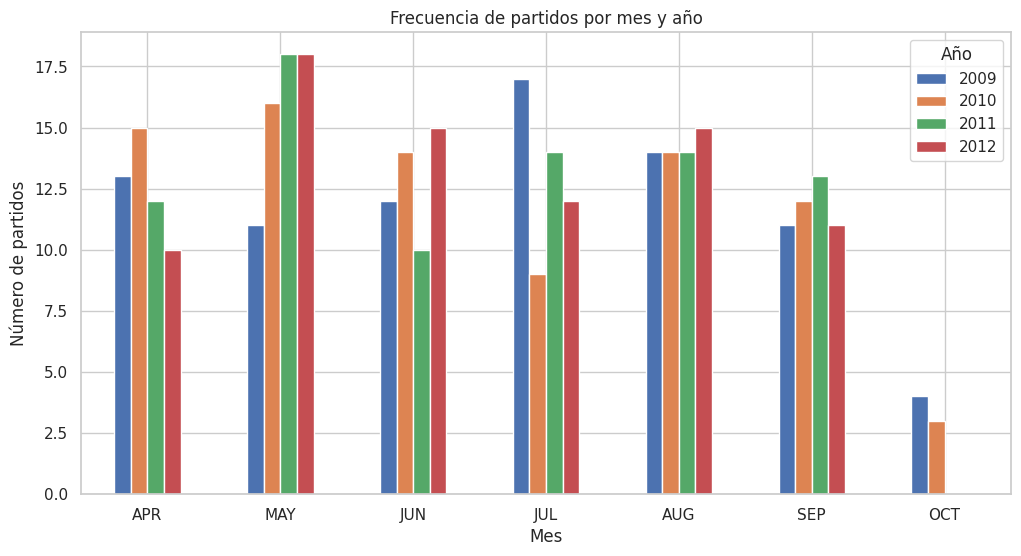

In [ ]:
import matplotlib.pyplot as plt

# tabla_partidos es tu tabla (años × meses)
tabla_partidos.T.plot(kind="bar", figsize=(12,6))

plt.title("Frecuencia de partidos por mes y año")
plt.xlabel("Mes")
plt.ylabel("Número de partidos")
plt.xticks(rotation=0)
plt.legend(title="Año")
plt.show()


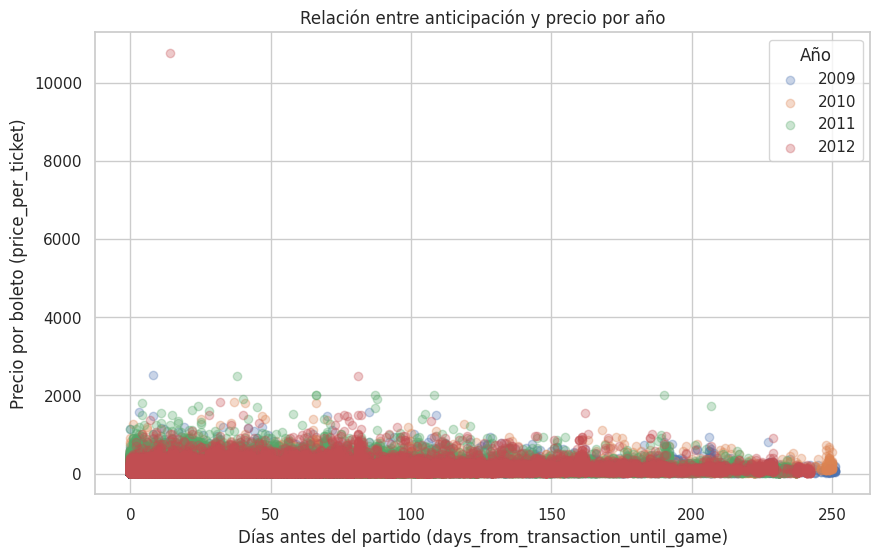

In [ ]:
import matplotlib.pyplot as plt

# Diagrama de dispersión: precio vs días previos
plt.figure(figsize=(10,6))
for year in sorted(df_clean["año"].unique()):
    subset = df_clean[df_clean["año"] == year]
    plt.scatter(subset["days_from_transaction_until_game"],
                subset["price_per_ticket"],
                alpha=0.3, label=year)

plt.xlabel("Días antes del partido (days_from_transaction_until_game)")
plt.ylabel("Precio por boleto (price_per_ticket)")
plt.title("Relación entre anticipación y precio por año")
plt.legend(title="Año")
plt.show()


In [ ]:
import pandas as pd

# Crear columna de año y mes (numérico)
df_clean["mes"] = df_clean["game_date"].dt.month
df_clean["anio"] = df_clean["game_date"].dt.year

# Agrupar: conteo de partidos y precio promedio
agg_mes = (
    df_clean.groupby(["anio","mes"])
    .agg(
        partidos_unicos=("game_date","nunique"),   # número de partidos en ese mes
        precio_promedio=("price_per_ticket","mean")  # promedio de precio
    )
    .reset_index()
)

print(agg_mes.head())


   anio  mes  partidos_unicos  precio_promedio
0  2009    4               13        95.195025
1  2009    5               11        88.022154
2  2009    6               12       104.503035
3  2009    7               17        92.610771
4  2009    8               14       118.526289


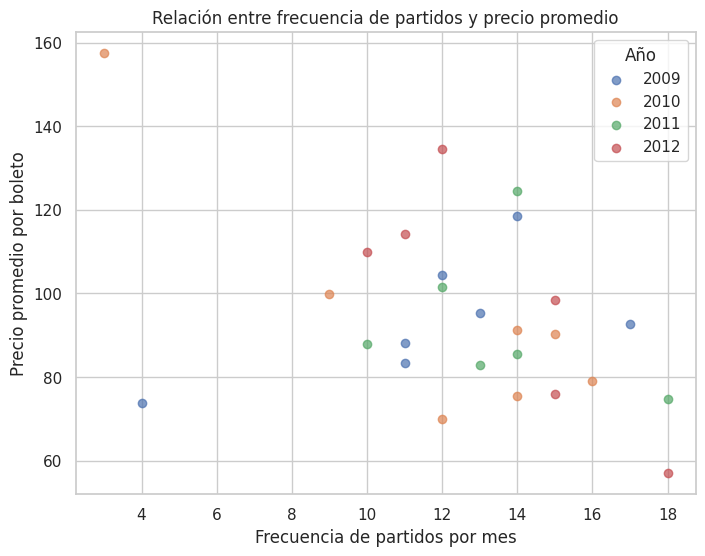

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

for year in sorted(agg_mes["anio"].unique()):
    subset = agg_mes[agg_mes["anio"] == year]
    plt.scatter(subset["partidos_unicos"], subset["precio_promedio"],
                label=year, alpha=0.7)

plt.xlabel("Frecuencia de partidos por mes")
plt.ylabel("Precio promedio por boleto")
plt.title("Relación entre frecuencia de partidos y precio promedio")
plt.legend(title="Año")
plt.show()


<Figure size 800x600 with 0 Axes>

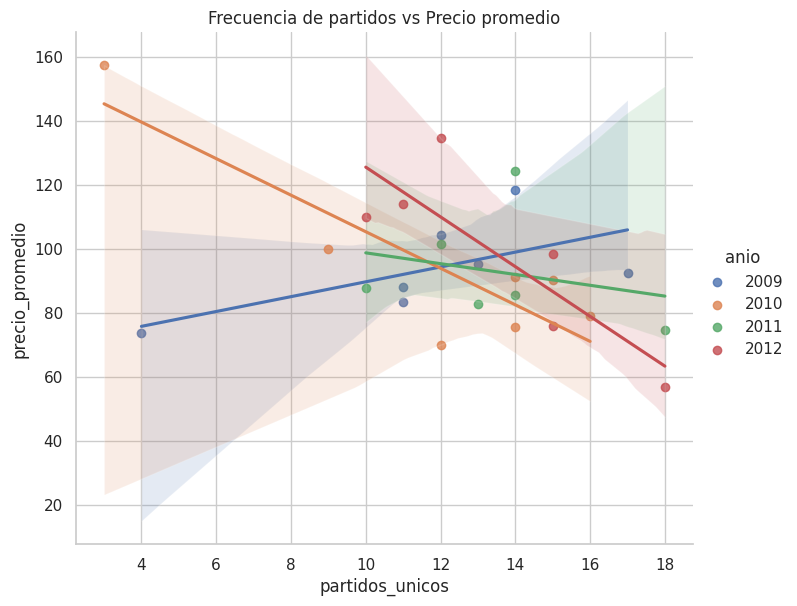

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.lmplot(
    data=agg_mes,
    x="partidos_unicos", y="precio_promedio",
    hue="anio", height=6, aspect=1.2
)
plt.title("Frecuencia de partidos vs Precio promedio")
plt.show()


In [ ]:
# Asegúrate de que tienes estas columnas:
df_clean["mes"] = df_clean["game_date"].dt.month
df_clean["anio"] = df_clean["game_date"].dt.year

# Tabla mensual
agg_mes = (
    df_clean.groupby(["anio","mes"])
    .agg(
        partidos_unicos=("game_date","nunique"),
        precio_promedio=("price_per_ticket","mean")
    )
    .reset_index()
)


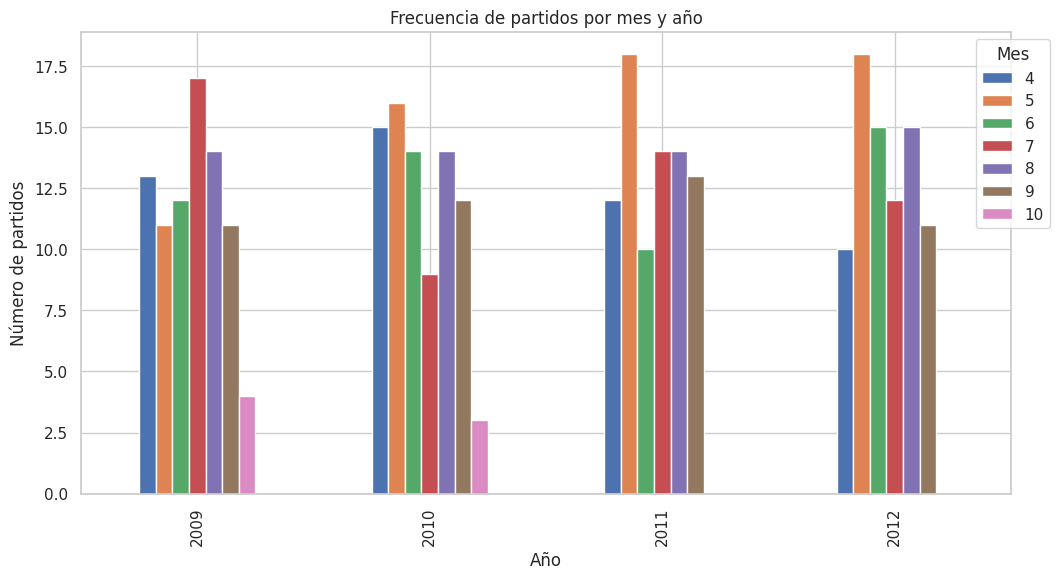

In [ ]:
import matplotlib.pyplot as plt

pivot_freq = agg_mes.pivot(index="anio", columns="mes", values="partidos_unicos")

pivot_freq.plot(kind="bar", figsize=(12,6))

plt.title("Frecuencia de partidos por mes y año")
plt.xlabel("Año")
plt.ylabel("Número de partidos")
plt.legend(title="Mes", bbox_to_anchor=(1.05, 1))
plt.show()


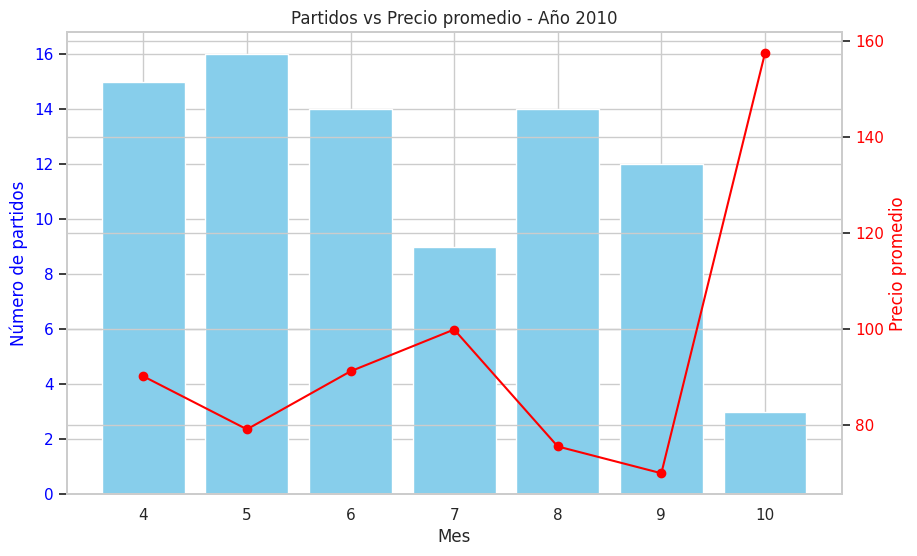

In [ ]:
# Ejemplo: elegir un año y ver mes a mes
anio_elegido = 2010
subset = agg_mes[agg_mes["anio"] == anio_elegido]

fig, ax1 = plt.subplots(figsize=(10,6))

# Barras: frecuencia de partidos
ax1.bar(subset["mes"], subset["partidos_unicos"], color="skyblue", label="Partidos")
ax1.set_xlabel("Mes")
ax1.set_ylabel("Número de partidos", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Línea: precio promedio
ax2 = ax1.twinx()
ax2.plot(subset["mes"], subset["precio_promedio"], color="red", marker="o", label="Precio promedio")
ax2.set_ylabel("Precio promedio", color="red")
ax2.tick_params(axis="y", labelcolor="red")

plt.title(f"Partidos vs Precio promedio - Año {anio_elegido}")
plt.show()


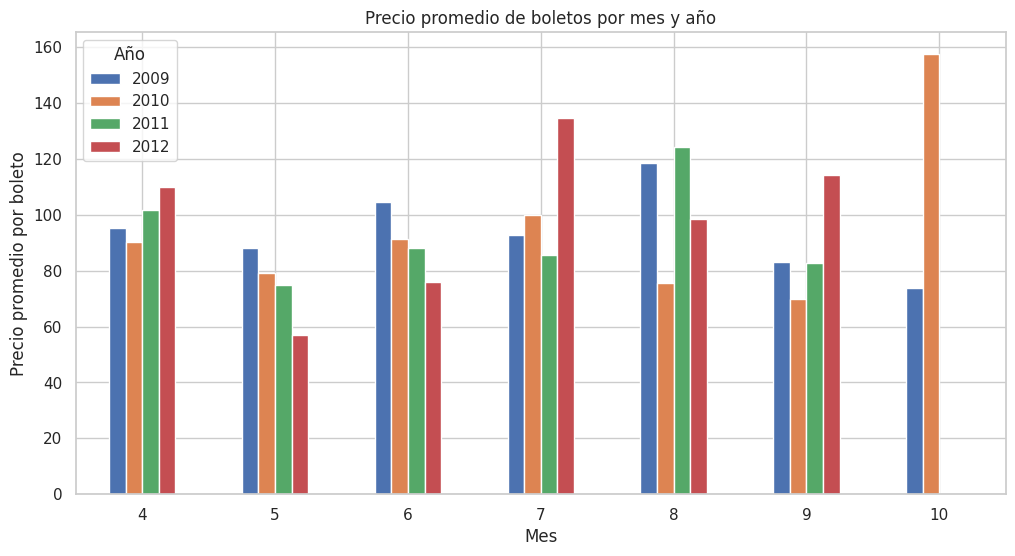

In [ ]:
import matplotlib.pyplot as plt

# Agrupar por año y mes → precio promedio
df_clean["mes"] = df_clean["game_date"].dt.month
df_clean["anio"] = df_clean["game_date"].dt.year

agg_price = (
    df_clean.groupby(["anio","mes"])["price_per_ticket"]
    .mean()
    .reset_index()
)

# Pivotar para tener años como series
pivot_price = agg_price.pivot(index="mes", columns="anio", values="price_per_ticket")

# Ordenar meses de abril (4) a octubre (10) → temporada MLB
pivot_price = pivot_price.loc[sorted(pivot_price.index)]

# Gráfica de barras agrupadas
pivot_price.plot(kind="bar", figsize=(12,6))

plt.title("Precio promedio de boletos por mes y año")
plt.xlabel("Mes")
plt.ylabel("Precio promedio por boleto")
plt.xticks(rotation=0)
plt.legend(title="Año")
plt.show()


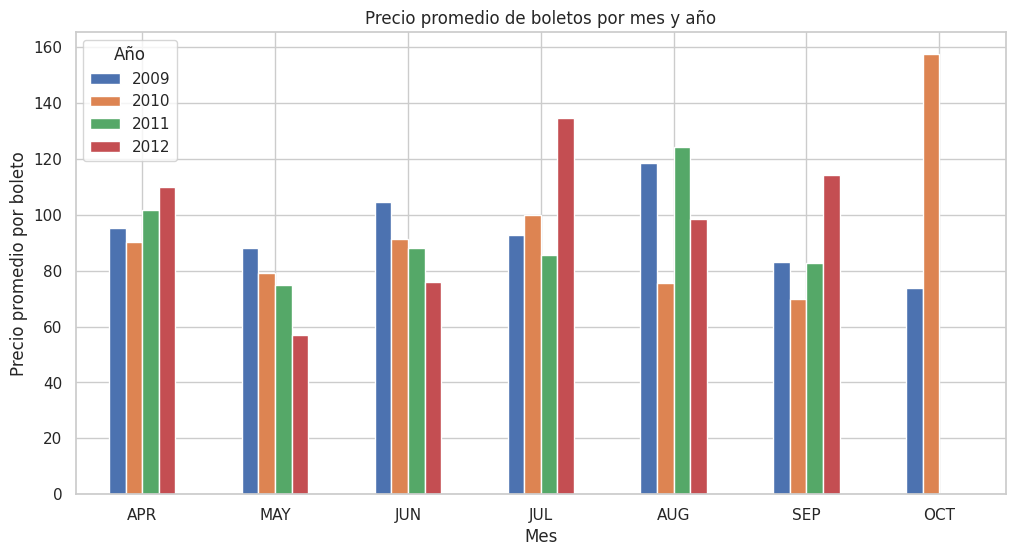

In [ ]:
import matplotlib.pyplot as plt

# Año y mes con abreviatura
df_clean["anio"] = df_clean["game_date"].dt.year
df_clean["mes_abbr"] = df_clean["game_date"].dt.strftime("%b").str.upper()

# Agrupar: precio promedio por año y mes
agg_price = (
    df_clean.groupby(["anio","mes_abbr"])["price_per_ticket"]
    .mean()
    .reset_index()
)

# Ordenar meses en secuencia MLB (abril–octubre)
month_order = ["APR","MAY","JUN","JUL","AUG","SEP","OCT"]
pivot_price = agg_price.pivot(index="mes_abbr", columns="anio", values="price_per_ticket")
pivot_price = pivot_price.reindex(month_order)

# Gráfica de barras agrupadas
pivot_price.plot(kind="bar", figsize=(12,6))

plt.title("Precio promedio de boletos por mes y año")
plt.xlabel("Mes")
plt.ylabel("Precio promedio por boleto")
plt.xticks(rotation=0)
plt.legend(title="Año")
plt.show()


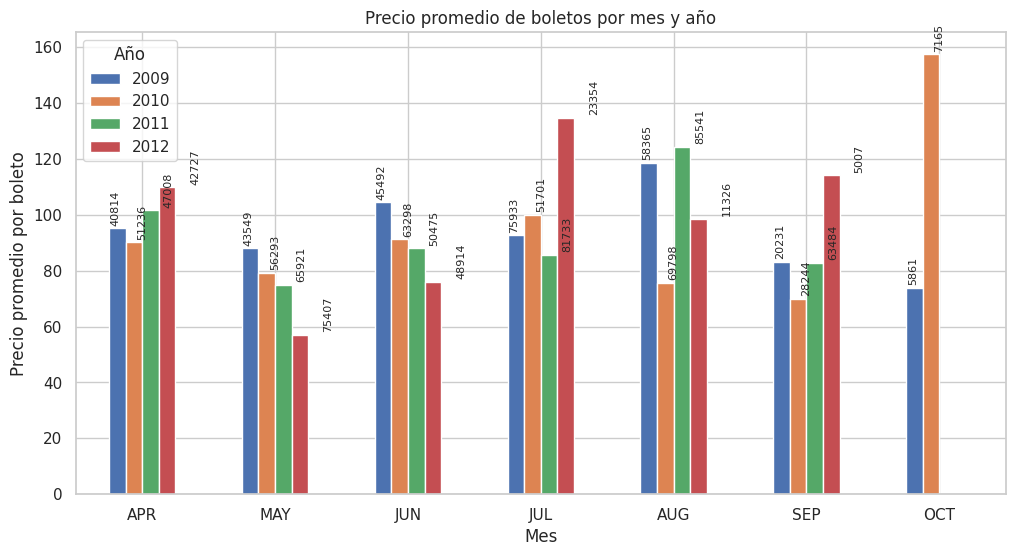

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Año y mes abreviado
df_clean["anio"] = df_clean["game_date"].dt.year
df_clean["mes_abbr"] = df_clean["game_date"].dt.strftime("%b").str.upper()

# Agregación: precio promedio y total de boletos
agg_price = (
    df_clean.groupby(["anio","mes_abbr"])
    .agg(
        precio_promedio=("price_per_ticket","mean"),
        boletos_totales=("number_of_tickets","sum")
    )
    .reset_index()
)

# Ordenar meses (abril–octubre)
month_order = ["APR","MAY","JUN","JUL","AUG","SEP","OCT"]
pivot_price = agg_price.pivot(index="mes_abbr", columns="anio", values="precio_promedio").reindex(month_order)
pivot_tickets = agg_price.pivot(index="mes_abbr", columns="anio", values="boletos_totales").reindex(month_order)

# Dibujar barras agrupadas
ax = pivot_price.plot(kind="bar", figsize=(12,6))

plt.title("Precio promedio de boletos por mes y año")
plt.xlabel("Mes")
plt.ylabel("Precio promedio por boleto")
plt.xticks(rotation=0)
plt.legend(title="Año")

# --- Añadir etiquetas de totales arriba de cada barra ---
for i, mes in enumerate(pivot_price.index):
    for j, year in enumerate(pivot_price.columns):
        valor_barra = pivot_price.loc[mes, year]
        total_boletos = pivot_tickets.loc[mes, year]
        if not np.isnan(valor_barra):  # evitar NaN
            ax.text(
                i + j/(len(pivot_price.columns)+1) - 0.2,  # posición X ajustada
                valor_barra + 1,                           # un poco arriba de la barra
                f"{int(total_boletos)}",                   # texto = boletos totales
                ha="center", va="bottom", fontsize=8, rotation=90
            )

plt.show()


In [ ]:
import statsmodels.api as sm

# Filtrar solo el año 2009
df_2009 = df_clean[df_clean["año"] == 2009].copy()

# Definir variables
X = df_2009["days_from_transaction_until_game"]
y = df_2009["price_per_ticket"]

# Agregar constante (intercepto)
X = sm.add_constant(X)

# Ajustar modelo OLS (Mínimos Cuadrados Ordinarios)
modelo_2009 = sm.OLS(y, X).fit()

# Resumen de la regresión
print(modelo_2009.summary())


                            OLS Regression Results                            
Dep. Variable:       price_per_ticket   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     181.2
Date:                Sat, 13 Sep 2025   Prob (F-statistic):           2.89e-41
Time:                        22:08:59   Log-Likelihood:            -5.7143e+05
No. Observations:               99042   AIC:                         1.143e+06
Df Residuals:                   99040   BIC:                         1.143e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

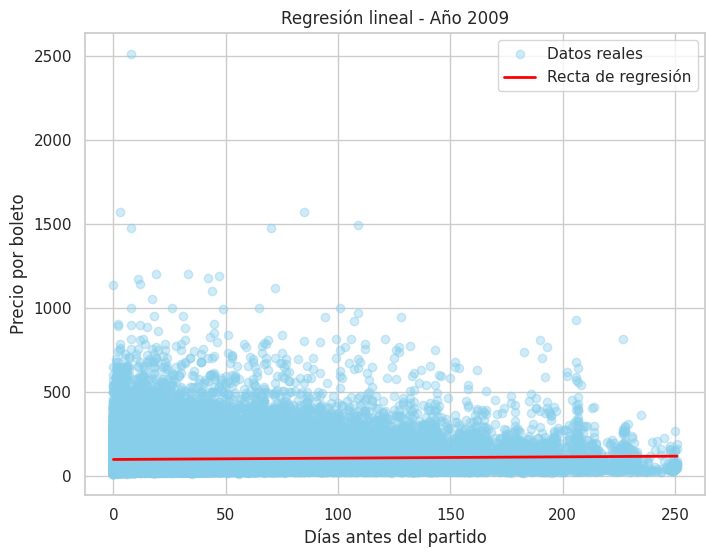

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Filtrar año 2009
df_2009 = df_clean[df_clean["año"] == 2009].copy()

# Variables
X = df_2009["days_from_transaction_until_game"]
y = df_2009["price_per_ticket"]

# Ajustar modelo
X_const = sm.add_constant(X)
modelo_2009 = sm.OLS(y, X_const).fit()

# --- Gráfica de dispersión ---
plt.figure(figsize=(8,6))
plt.scatter(X, y, alpha=0.4, label="Datos reales", color="skyblue")

# Línea de regresión
x_vals = np.linspace(X.min(), X.max(), 100)
y_pred = modelo_2009.params["const"] + modelo_2009.params["days_from_transaction_until_game"] * x_vals
plt.plot(x_vals, y_pred, color="red", linewidth=2, label="Recta de regresión")

# Etiquetas
plt.title("Regresión lineal - Año 2009")
plt.xlabel("Días antes del partido")
plt.ylabel("Precio por boleto")
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import pearsonr, spearmanr

ANIOS = [2009, 2010, 2011, 2012]
resultados = []

for year in ANIOS:
    # Filtrar y limpiar
    cols = ["price_per_ticket", "days_from_transaction_until_game"]
    dfy = df_clean.loc[df_clean["año"] == year, cols].dropna().copy()
    n = len(dfy)

    if n < 10:
        resultados.append({
            "año": year, "n": n,
            "const_coef": np.nan, "const_p": np.nan,
            "days_coef": np.nan, "days_p": np.nan,
            "r2": np.nan, "r2_adj": np.nan,
            "pearson_r": np.nan, "pearson_p": np.nan,
            "spearman_rho": np.nan, "spearman_p": np.nan
        })
        print(f"Año {year}: muy pocos datos (n={n}). Se omite la regresión.")
        continue

    # Variables
    y = dfy["price_per_ticket"].astype(float).values
    X = dfy["days_from_transaction_until_game"].astype(float).values.reshape(-1, 1)

    # Agregar constante y ajustar modelo
    Xc = sm.add_constant(X)
    modelo = sm.OLS(y, Xc).fit()

    # Correlaciones
    pr, pp = pearsonr(X.ravel(), y)
    sr, sp = spearmanr(X.ravel(), y)

    # Extraer coeficientes y p-valores
    const_coef = modelo.params[0]
    days_coef  = modelo.params[1]
    const_p    = modelo.pvalues[0]
    days_p     = modelo.pvalues[1]

    resultados.append({
        "año": year,
        "n": n,
        "const_coef": const_coef,
        "const_p": const_p,
        "days_coef": days_coef,
        "days_p": days_p,
        "r2": modelo.rsquared,
        "r2_adj": modelo.rsquared_adj,
        "pearson_r": pr,
        "pearson_p": pp,
        "spearman_rho": sr,
        "spearman_p": sp
    })

    # Resumen compacto por año
    print(f"\n=== Año {year} ===")
    print(f"Constante: {const_coef:.4f} (p={const_p:.4g})")
    print(f"Coef días: {days_coef:.4f} (p={days_p:.4g})")
    print(f"R²={modelo.rsquared:.3f} | Pearson={pr:.3f} (p={pp:.3g}) | Spearman={sr:.3f} (p={sp:.3g})")

# --- Tabla resumen ---
res_df = pd.DataFrame(resultados).sort_values("año")
cols = [
    "año","n",
    "const_coef","const_p",
    "days_coef","days_p",
    "r2","r2_adj",
    "pearson_r","pearson_p",
    "spearman_rho","spearman_p"
]

res_df = res_df[cols].round(4)

print("\n\n=== Resumen comparativo por año ===")
display(res_df)



=== Año 2009 ===
Constante: 95.5050 (p=0)
Coef días: 0.0786 (p=2.889e-41)
R²=0.002 | Pearson=0.043 (p=2.89e-41) | Spearman=0.060 (p=1.19e-80)

=== Año 2010 ===
Constante: 77.3827 (p=0)
Coef días: 0.2846 (p=0)
R²=0.025 | Pearson=0.157 (p=0) | Spearman=0.232 (p=0)

=== Año 2011 ===
Constante: 85.7880 (p=0)
Coef días: 0.2748 (p=0)
R²=0.016 | Pearson=0.128 (p=0) | Spearman=0.226 (p=0)

=== Año 2012 ===
Constante: 66.2078 (p=0)
Coef días: 0.4675 (p=0)
R²=0.050 | Pearson=0.224 (p=0) | Spearman=0.409 (p=0)


=== Resumen comparativo por año ===


,año,n,const_coef,const_p,days_coef,days_p,r2,r2_adj,pearson_r,pearson_p,spearman_rho,spearman_p
0,2009,99042,95.5050,0.0,0.0786,0.0,0.0018,0.0018,0.0427,0.0,0.0604,0.0
1,2010,109713,77.3827,0.0,0.2846,0.0,0.0246,0.0246,0.1568,0.0,0.2319,0.0
2,2011,135644,85.7880,0.0,0.2748,0.0,0.0165,0.0165,0.1284,0.0,0.2256,0.0
3,2012,69746,66.2078,0.0,0.4675,0.0,0.0501,0.0501,0.2239,0.0,0.4087,0.0


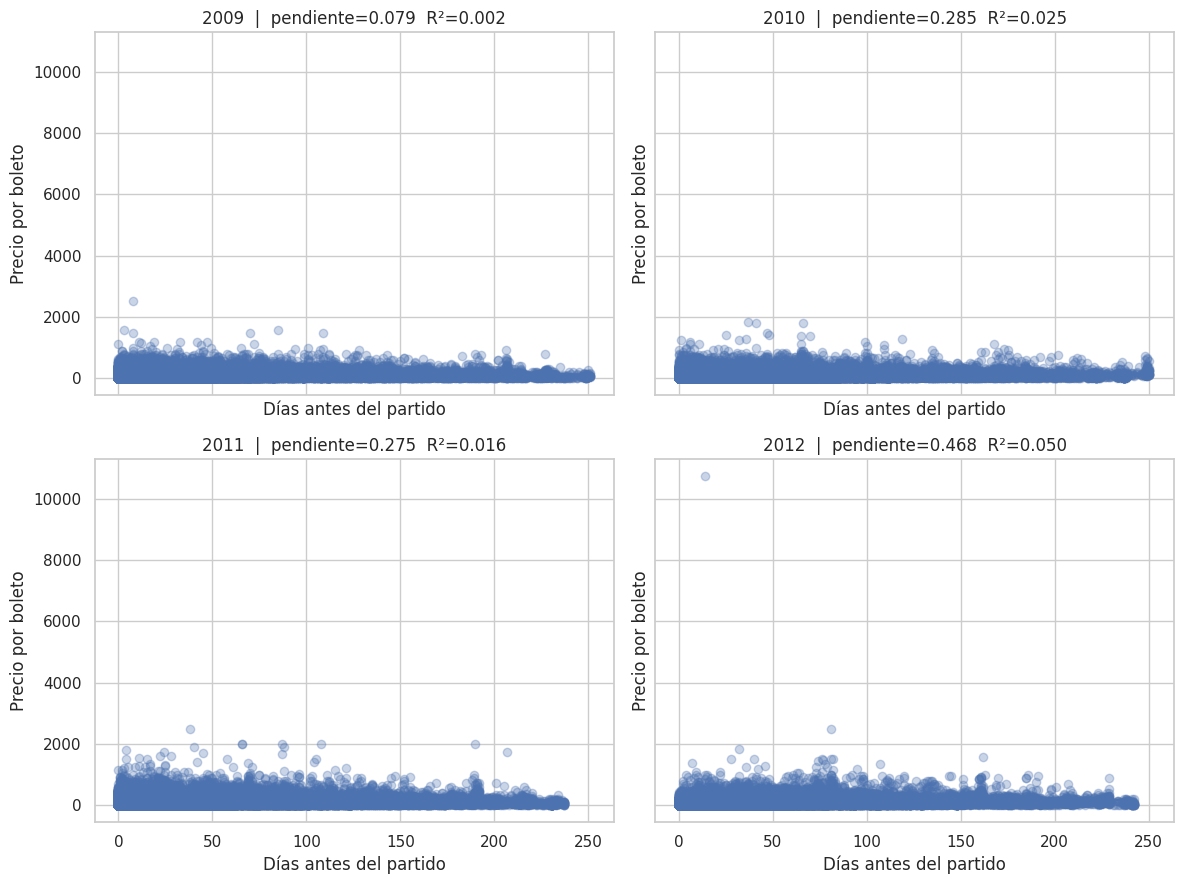

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

ANIOS = [2009, 2010, 2011, 2012]

fig, axes = plt.subplots(2, 2, figsize=(12, 9), sharex=True, sharey=True)
axes = axes.ravel()

for i, year in enumerate(ANIOS):
    ax = axes[i]
    dfy = df_clean.loc[df_clean["año"] == year, ["days_from_transaction_until_game","price_per_ticket"]].dropna().copy()

    if dfy.empty:
        ax.set_title(f"Año {year}: sin datos")
        ax.set_xlabel("Días antes del partido")
        ax.set_ylabel("Precio por boleto")
        continue

    X = dfy["days_from_transaction_until_game"].astype(float).values
    y = dfy["price_per_ticket"].astype(float).values

    # Ajustar OLS: y ~ const + X
    Xc = sm.add_constant(X)
    model = sm.OLS(y, Xc).fit()

    # Dispersión
    ax.scatter(X, y, alpha=0.3)

    # Línea de regresión en una malla ordenada
    x_grid = np.linspace(X.min(), X.max(), 200)
    y_pred = model.params[0] + model.params[1]*x_grid
    ax.plot(x_grid, y_pred, linewidth=2)

    # Título con métrica
    slope = model.params[1]
    r2 = model.rsquared
    ax.set_title(f"{year}  |  pendiente={slope:.3f}  R²={r2:.3f}")

    ax.set_xlabel("Días antes del partido")
    ax.set_ylabel("Precio por boleto")

# Ajustes de layout
plt.tight_layout()
plt.show()


In [ ]:
import statsmodels.formula.api as smf

# Años a modelar
ANIOS = [2009, 2010, 2011, 2012]
resultados = {}

for year in ANIOS:
    # Filtrar datos por año
    dfy = df_clean[df_clean["año"] == year].copy()

    # Modelo OLS multivariable
    formula = """
    price_per_ticket ~
        days_from_transaction_until_game +
        number_of_tickets +
        day_game +
        weekend_game +
        C(sectiontype) +
        C(team) +
        C(gamemonth)
    """

    modelo = smf.ols(formula, data=dfy).fit()
    resultados[year] = modelo

    print(f"\n=== Resultados {year} ===")
    print(modelo.summary())



=== Resultados 2009 ===
                            OLS Regression Results                            
Dep. Variable:       price_per_ticket   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     6151.
Date:                Sat, 13 Sep 2025   Prob (F-statistic):               0.00
Time:                        22:38:36   Log-Likelihood:            -5.0546e+05
No. Observations:               99042   AIC:                         1.011e+06
Df Residuals:                   98996   BIC:                         1.011e+06
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

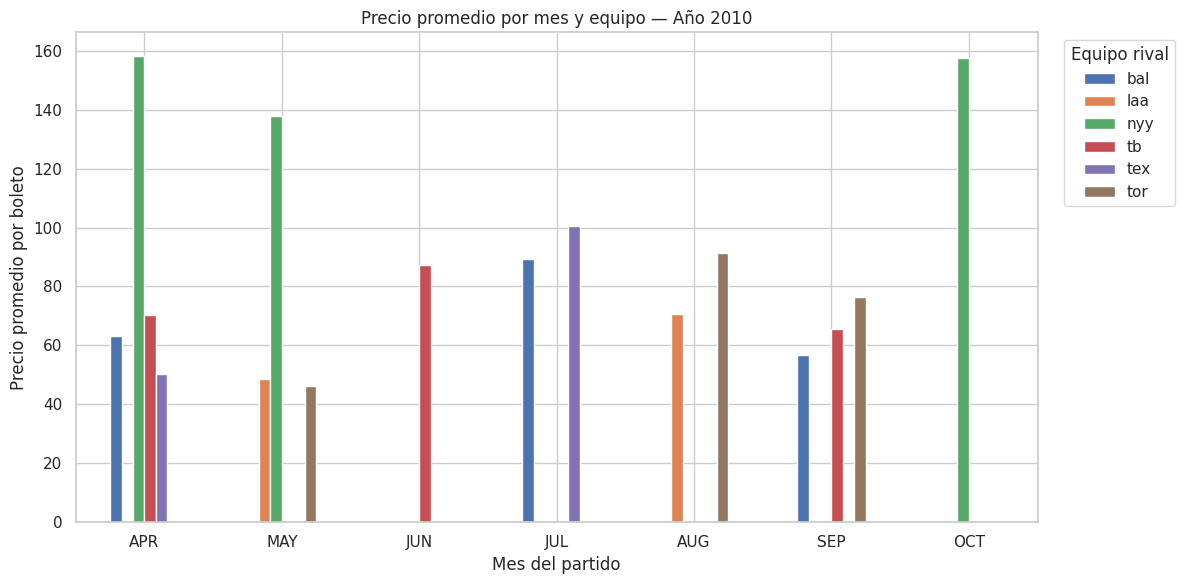

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Parámetros editables ---
anio_elegido = 2010      # cambia a 2009, 2010, 2011 o 2012
top_n_teams  = 6         # cuántos equipos mostrar (para que no se sature la leyenda)

# --- Preparación de columnas de tiempo ---
df_clean["anio"] = df_clean["game_date"].dt.year
df_clean["gamemonth_abbr"] = df_clean["game_date"].dt.strftime("%b").str.upper()

# Restringe al año elegido
dfy = df_clean[df_clean["anio"] == anio_elegido].copy()

# Orden natural de meses MLB (abril–octubre)
month_order = ["APR","MAY","JUN","JUL","AUG","SEP","OCT"]

# Seleccionar Top-N equipos por volumen en ese año (para que la gráfica sea legible)
top_teams = (
    dfy["team"].value_counts()
        .head(top_n_teams)
        .index.tolist()
)

# Agregado: precio promedio por mes x equipo
agg = (
    dfy[dfy["team"].isin(top_teams)]
      .groupby(["gamemonth_abbr","team"])["price_per_ticket"]
      .mean()
      .reset_index()
)

# Pivot a formato ancho: filas=mes, columnas=equipo, valores=precio promedio
pivot_price = (
    agg.pivot(index="gamemonth_abbr", columns="team", values="price_per_ticket")
       .reindex(month_order)
)

# Gráfica de barras agrupadas
ax = pivot_price.plot(kind="bar", figsize=(12,6))
ax.set_title(f"Precio promedio por mes y equipo — Año {anio_elegido}")
ax.set_xlabel("Mes del partido")
ax.set_ylabel("Precio promedio por boleto")
ax.set_xticklabels(pivot_price.index, rotation=0)
ax.legend(title="Equipo rival", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


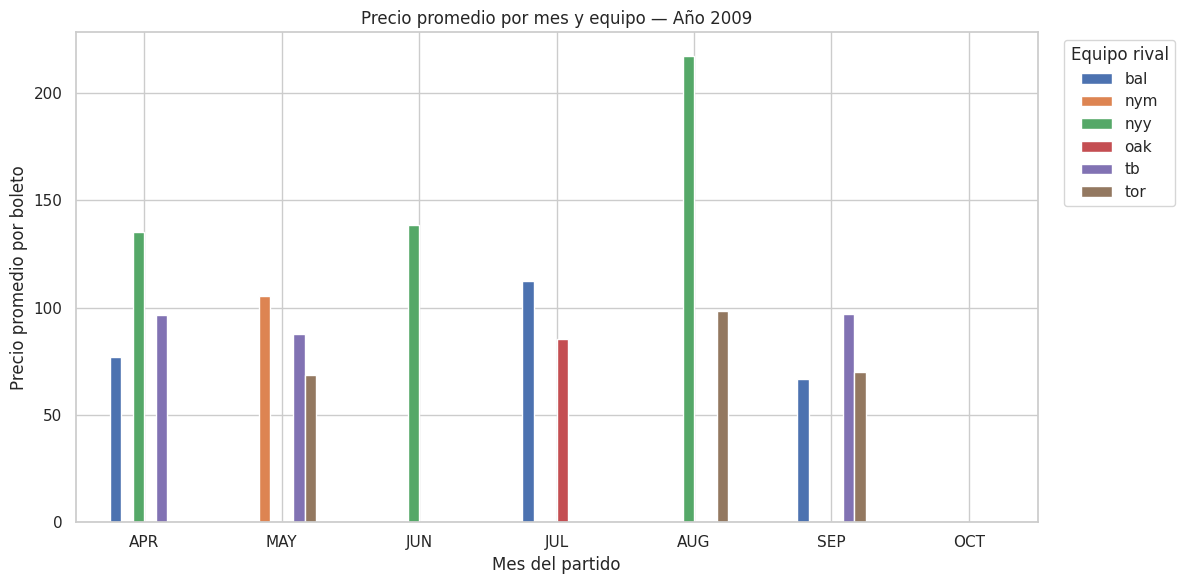

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Parámetros ---
anio_elegido = 2009
top_n_teams  = 6   # sube/baja este número según qué tan cargada quieras la gráfica

# Mes abreviado desde la fecha del juego
df_clean["anio"] = df_clean["game_date"].dt.year
df_clean["gamemonth_abbr"] = df_clean["game_date"].dt.strftime("%b").str.upper()

# Filtrar 2009
dfy = df_clean[df_clean["anio"] == anio_elegido].copy()

# Orden natural de temporada MLB (abril–octubre)
month_order = ["APR","MAY","JUN","JUL","AUG","SEP","OCT"]

# Top-N equipos por volumen en 2009
top_teams = (
    dfy["team"].value_counts()
        .head(top_n_teams)
        .index.tolist()
)

# Agregado: precio promedio y conteo por mes × equipo (solo top teams)
agg = (
    dfy[dfy["team"].isin(top_teams)]
      .groupby(["gamemonth_abbr","team"])
      .agg(
          price_mean=("price_per_ticket","mean"),
          n_trans=("price_per_ticket","size")
      )
      .reset_index()
)

# Pivot a formato ancho para graficar
pivot_price = (
    agg.pivot(index="gamemonth_abbr", columns="team", values="price_mean")
       .reindex(month_order)
)

# Gráfica de barras agrupadas
ax = pivot_price.plot(kind="bar", figsize=(12,6))
ax.set_title(f"Precio promedio por mes y equipo — Año {anio_elegido}")
ax.set_xlabel("Mes del partido")
ax.set_ylabel("Precio promedio por boleto")
ax.set_xticklabels(pivot_price.index, rotation=0)
ax.legend(title="Equipo rival", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

# --- (Opcional) Etiquetas con # transacciones sobre cada barra ---
# Descomenta para agregar etiquetas:
# pivot_count = agg.pivot(index="gamemonth_abbr", columns="team", values="n_trans").reindex(month_order)
# ax = pivot_price.plot(kind="bar", figsize=(12,6))
# for i, mes in enumerate(pivot_price.index):
#     for j, team in enumerate(pivot_price.columns):
#         yval = pivot_price.loc[mes, team]
#         if pd.notna(yval):
#             # posición x de cada barra dentro del grupo
#             x = i + (j - (len(pivot_price.columns)-1)/2) * (0.8/len(pivot_price.columns))
#             n = int(pivot_count.loc[mes, team]) if pd.notna(pivot_count.loc[mes, team]) else 0
#             ax.text(x, yval, f"{n}", ha="center", va="bottom", fontsize=8, rotation=90)
# ax.set_title(f"Precio promedio por mes y equipo — Año {anio_elegido} (con # transacciones)")
# ax.set_xlabel("Mes del partido")
# ax.set_ylabel("Precio promedio por boleto")
# ax.set_xticklabels(pivot_price.index, rotation=0)
# ax.legend(title="Equipo rival", bbox_to_anchor=(1.02, 1), loc="upper left")
# plt.tight_layout()
# plt.show()


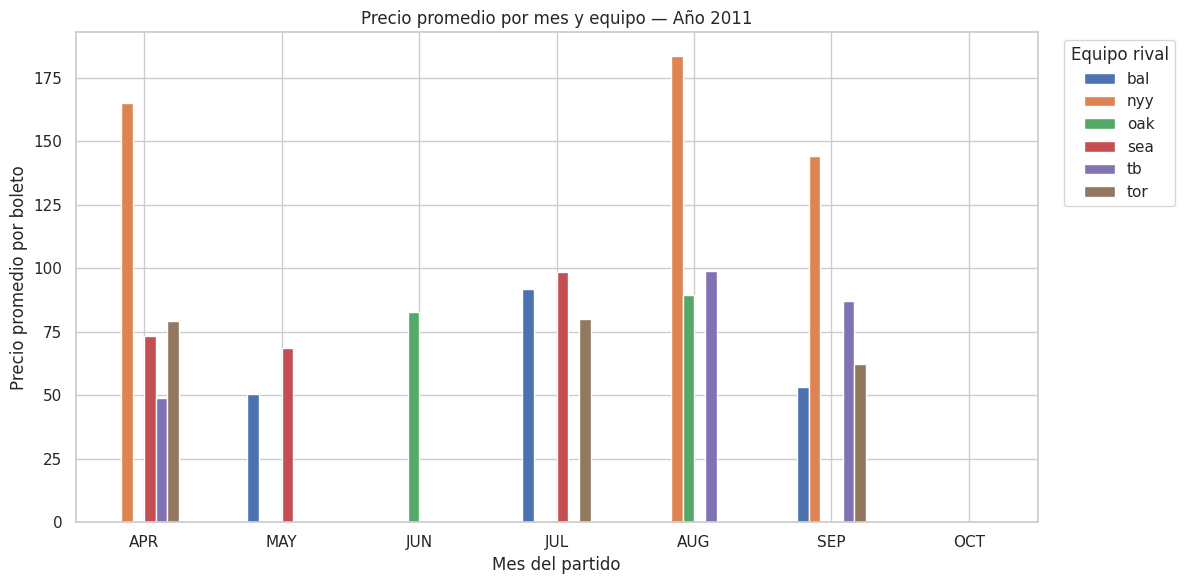

In [ ]:
# ========= 1) Barras: precio promedio por mes y equipo (Año 2011) =========
import pandas as pd
import matplotlib.pyplot as plt

anio_elegido = 2011
top_n_teams  = 6  # ajusta si quieres más/menos equipos en la leyenda

# Derivar año y mes abreviado desde la fecha del juego (si no existen)
df_clean["anio"] = df_clean["game_date"].dt.year
df_clean["gamemonth_abbr"] = df_clean["game_date"].dt.strftime("%b").str.upper()

# Filtrar año
dfy = df_clean[df_clean["anio"] == anio_elegido].copy()

# Orden natural MLB (abr–oct)
month_order = ["APR","MAY","JUN","JUL","AUG","SEP","OCT"]

# Top-N equipos por volumen en ese año
top_teams = (
    dfy["team"].value_counts()
       .head(top_n_teams)
       .index.tolist()
)

# Agregado: precio promedio y # transacciones por mes × equipo
agg = (
    dfy[dfy["team"].isin(top_teams)]
      .groupby(["gamemonth_abbr","team"])
      .agg(price_mean=("price_per_ticket","mean"),
           n_trans=("price_per_ticket","size"))
      .reset_index()
)

# Pivot para graficar
pivot_price = (
    agg.pivot(index="gamemonth_abbr", columns="team", values="price_mean")
       .reindex(month_order)
)

# Gráfica de barras agrupadas
ax = pivot_price.plot(kind="bar", figsize=(12,6))
ax.set_title(f"Precio promedio por mes y equipo — Año {anio_elegido}")
ax.set_xlabel("Mes del partido")
ax.set_ylabel("Precio promedio por boleto")
ax.set_xticklabels(pivot_price.index, rotation=0)
ax.legend(title="Equipo rival", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

# --- (Opcional) Etiquetas con # de transacciones sobre cada barra ---
# pivot_count = agg.pivot(index="gamemonth_abbr", columns="team", values="n_trans").reindex(month_order)
# ax = pivot_price.plot(kind="bar", figsize=(12,6))
# for i, mes in enumerate(pivot_price.index):
#     for j, team in enumerate(pivot_price.columns):
#         yval = pivot_price.loc[mes, team]
#         if pd.notna(yval):
#             # posición x de la barra dentro del grupo
#             x = i + (j - (len(pivot_price.columns)-1)/2) * (0.8/len(pivot_price.columns))
#             n = int(pivot_count.loc[mes, team]) if pd.notna(pivot_count.loc[mes, team]) else 0
#             ax.text(x, yval, f"{n}", ha="center", va="bottom", fontsize=8, rotation=90)
# ax.set_title(f"Precio promedio por mes y equipo — Año {anio_elegido} (con # transacciones)")
# ax.set_xlabel("Mes del partido"); ax.set_ylabel("Precio promedio por boleto")
# ax.set_xticklabels(pivot_price.index, rotation=0)
# ax.legend(title="Equipo rival", bbox_to_anchor=(1.02, 1), loc="upper left")
# plt.tight_layout(); plt.show()


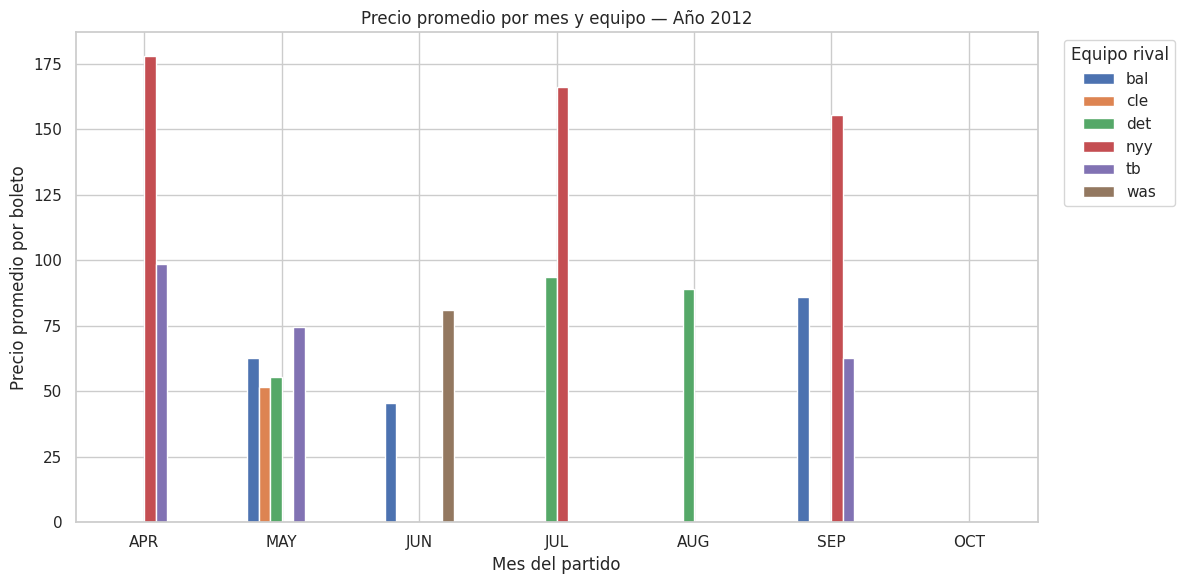

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

anio_elegido = 2012
top_n_teams  = 6   # cambia este número si quieres más o menos equipos en la leyenda

# Asegurar columnas auxiliares
df_clean["anio"] = df_clean["game_date"].dt.year
df_clean["gamemonth_abbr"] = df_clean["game_date"].dt.strftime("%b").str.upper()

# Filtrar 2012
dfy = df_clean[df_clean["anio"] == anio_elegido].copy()

# Orden natural temporada MLB
month_order = ["APR","MAY","JUN","JUL","AUG","SEP","OCT"]

# Selección de Top-N equipos por volumen en ese año
top_teams = (
    dfy["team"].value_counts()
       .head(top_n_teams)
       .index.tolist()
)

# Agregado: precio promedio y número de transacciones por mes × equipo
agg = (
    dfy[dfy["team"].isin(top_teams)]
      .groupby(["gamemonth_abbr","team"])
      .agg(price_mean=("price_per_ticket","mean"),
           n_trans=("price_per_ticket","size"))
      .reset_index()
)

# Pivot ancho: filas=mes, columnas=equipo, valores=precio promedio
pivot_price = (
    agg.pivot(index="gamemonth_abbr", columns="team", values="price_mean")
       .reindex(month_order)
)

# Gráfica de barras agrupadas
ax = pivot_price.plot(kind="bar", figsize=(12,6))
ax.set_title(f"Precio promedio por mes y equipo — Año {anio_elegido}")
ax.set_xlabel("Mes del partido")
ax.set_ylabel("Precio promedio por boleto")
ax.set_xticklabels(pivot_price.index, rotation=0)
ax.legend(title="Equipo rival", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

# --- (Opcional) Eti


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que guardaste los modelos como diccionario
modelos = {
    2009: modelo_2009,
    2010: modelo_2010,
    2011: modelo_2011,
    2012: modelo_2012
}

# 1) Extraer coeficientes y p-valores
results = []
for year, mod in modelos.items():
    coefs = mod.params
    pvals = mod.pvalues
    for var in coefs.index:
        results.append({
            "año": year,
            "variable": var,
            "coef": coefs[var],
            "pval": pvals[var]
        })

df_coefs = pd.DataFrame(results)

# 2) Filtrar significativos
df_sig = df_coefs[df_coefs["pval"] < 0.05]

# 3) Tabla resumen (top variables por magnitud de coef en cada año)
tabla_top = (
    df_sig.assign(abscoef=df_sig["coef"].abs())
          .sort_values(["año","abscoef"], ascending=[True,False])
          .groupby("año")
          .head(10)
)
print(tabla_top)

# 4) Visualizar coeficientes seleccionados
vars_clave = ["days_from_transaction_until_game","number_of_tickets","day_game","weekend_game"]

fig, axes = plt.subplots(1, 4, figsize=(16,6), sharey=True)
for i, year in enumerate([2009,2010,2011,2012]):
    subset = df_sig[(df_sig["año"]==year) & (df_sig["variable"].isin(vars_clave))]
    axes[i].barh(subset["variable"], subset["coef"])
    axes[i].set_title(f"Año {year}")
    axes[i].axvline(0, color="black", lw=1)
plt.suptitle("Coeficientes significativos en la regresión multivariable (selección de variables)")
plt.tight_layout()
plt.show()


NameError: name 'modelo_2010' is not defined

=== Top 10 coeficientes por año ===
      año                          variable        coef           pval  \
0    2009                         Intercept  473.973257   0.000000e+00   
13   2009          C(sectiontype)[T.pavsro] -433.252622   0.000000e+00   
19   2009             C(sectiontype)[T.sro] -432.600996   0.000000e+00   
20   2009  C(sectiontype)[T.upperbleachers] -420.719150   0.000000e+00   
17   2009            C(sectiontype)[T.rfgs] -409.683668   0.000000e+00   
14   2009      C(sectiontype)[T.rfdeck_sro] -408.657878   0.000000e+00   
7    2009  C(sectiontype)[T.lowerbleachers] -407.468519   0.000000e+00   
2    2009        C(sectiontype)[T.familygs] -395.724875   0.000000e+00   
18   2009       C(sectiontype)[T.rfroofbox] -384.237673   0.000000e+00   
16   2009      C(sectiontype)[T.rffieldbox] -373.002122   0.000000e+00   
65   2010             C(sectiontype)[T.sro] -414.101879   0.000000e+00   
59   2010          C(sectiontype)[T.pavsro] -409.596154   0.000000e+00   
66

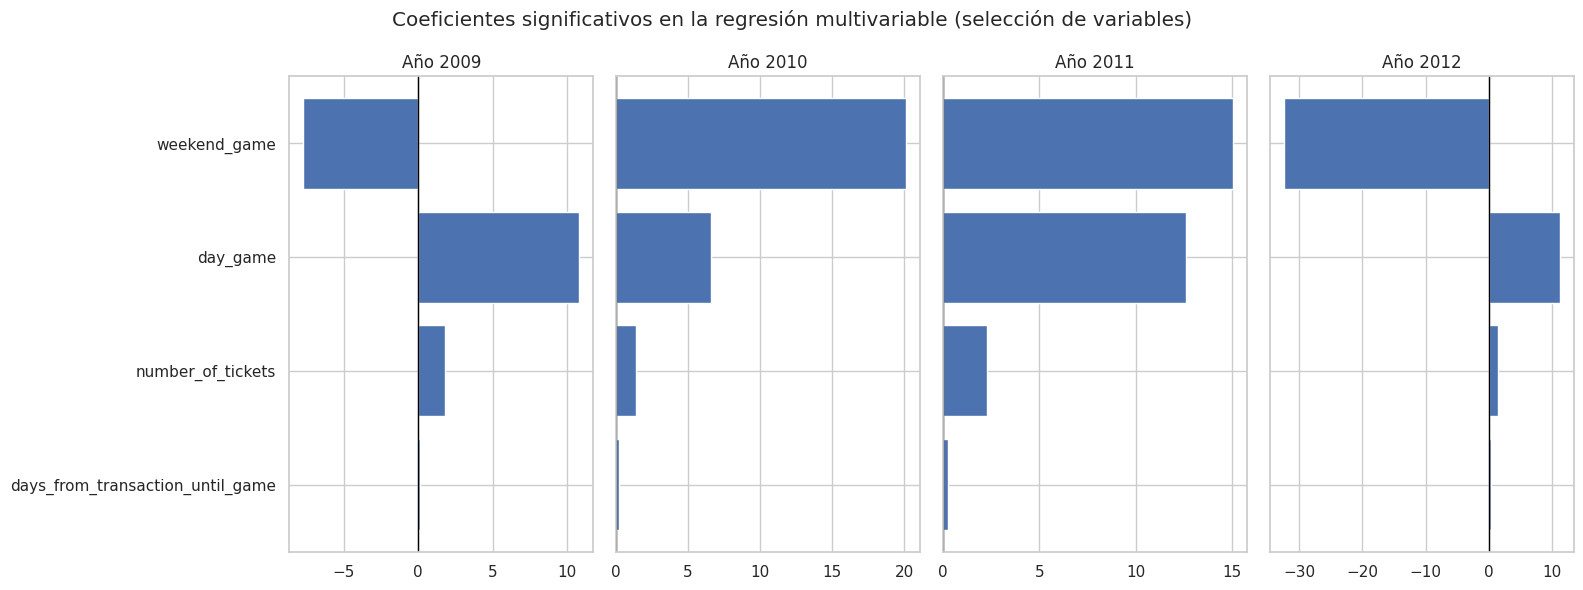

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Usa directamente el diccionario que ya creaste
modelos = resultados

# 1) Extraer coeficientes y p-valores
results = []
for year, mod in modelos.items():
    coefs = mod.params
    pvals = mod.pvalues
    for var in coefs.index:
        results.append({
            "año": year,
            "variable": var,
            "coef": coefs[var],
            "pval": pvals[var]
        })

df_coefs = pd.DataFrame(results)

# 2) Filtrar significativos
df_sig = df_coefs[df_coefs["pval"] < 0.05]

# 3) Tabla resumen (top variables por magnitud de coef en cada año)
tabla_top = (
    df_sig.assign(abscoef=df_sig["coef"].abs())
          .sort_values(["año","abscoef"], ascending=[True,False])
          .groupby("año")
          .head(10)
)
print("=== Top 10 coeficientes por año ===")
print(tabla_top)

# 4) Visualizar coeficientes seleccionados
vars_clave = ["days_from_transaction_until_game","number_of_tickets","day_game","weekend_game"]

fig, axes = plt.subplots(1, 4, figsize=(16,6), sharey=True)
for i, year in enumerate([2009,2010,2011,2012]):
    subset = df_sig[(df_sig["año"]==year) & (df_sig["variable"].isin(vars_clave))]
    axes[i].barh(subset["variable"], subset["coef"])
    axes[i].set_title(f"Año {year}")
    axes[i].axvline(0, color="black", lw=1)
plt.suptitle("Coeficientes significativos en la regresión multivariable (selección de variables)")
plt.tight_layout()
plt.show()


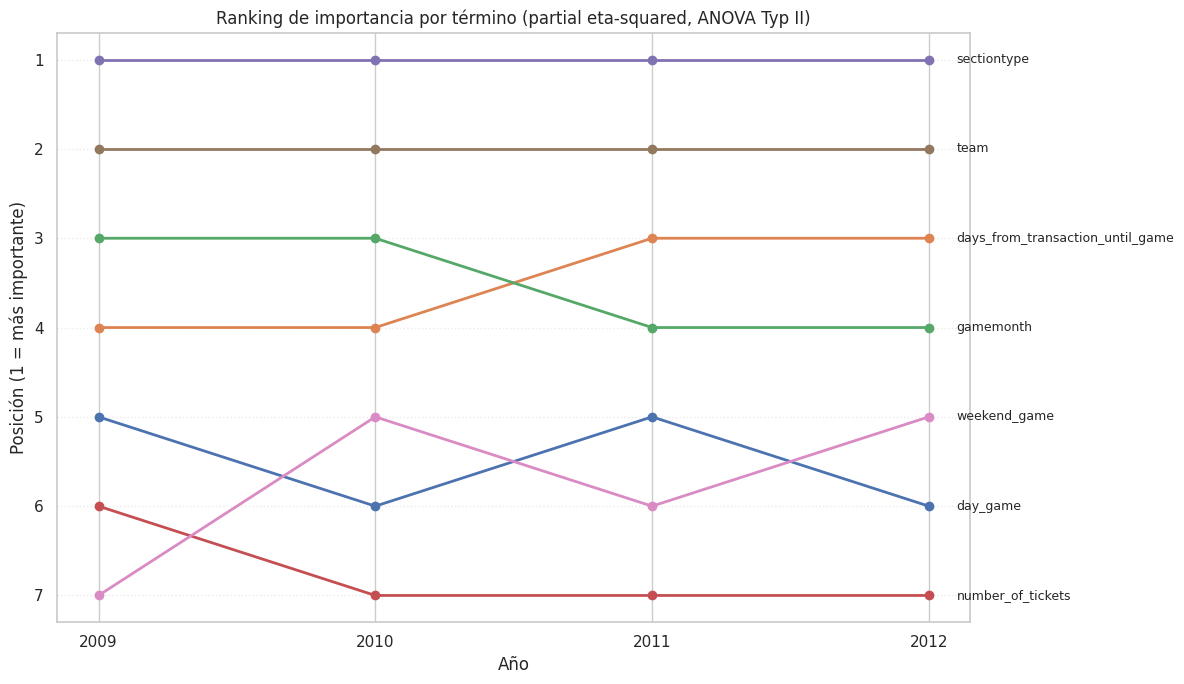

=== Ranking por término (1=Top) ===


año,2009,2010,2011,2012
termino,,,,
C(sectiontype),1.0,1.0,1.0,1.0
C(team),2.0,2.0,2.0,2.0
C(gamemonth),3.0,3.0,4.0,4.0
days_from_transaction_until_game,4.0,4.0,3.0,3.0
day_game,5.0,6.0,5.0,6.0
number_of_tickets,6.0,7.0,7.0,7.0
weekend_game,7.0,5.0,6.0,5.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.anova import anova_lm

# === Parámetros ===
ANIOS = [2009, 2010, 2011, 2012]
TOP_K_POR_ANIO = 8        # cuántos términos top tomar por año para el bump chart
INCLUIR_TERMINOS = None   # o una lista de términos a incluir; deja None para auto-selección

# resultará en una tabla larga con: año, termino, eta2_parcial, rank
filas = []

for year in ANIOS:
    mod = resultados[year]  # tu modelo OLS con formula
    # ANOVA tipo II -> particiona por término (mejor para fórmulas con dummies grupos)
    aov = anova_lm(mod, typ=2)
    # Partial eta-squared: SS_effect / (SS_effect + SS_error)
    ss_error = aov.loc["Residual", "sum_sq"] if "Residual" in aov.index else mod.ssr
    # Filtrar términos válidos (excluye Residual)
    aov_terms = aov.drop(index=[ix for ix in aov.index if ix.lower()=="residual"], errors="ignore").copy()
    aov_terms["eta2_partial"] = aov_terms["sum_sq"] / (aov_terms["sum_sq"] + ss_error)
    aov_terms["año"] = year
    aov_terms["termino"] = aov_terms.index

    # Si quieres filtrar términos por nombre:
    if INCLUIR_TERMINOS is not None:
        aov_terms = aov_terms[aov_terms["termino"].isin(INCLUIR_TERMINOS)]

    # Guardar filas
    filas.append(aov_terms[["año","termino","eta2_partial"]])

df_eta = pd.concat(filas, ignore_index=True)

# Ranking por año (1 = más importante)
df_eta["rank"] = df_eta.groupby("año")["eta2_partial"].rank(ascending=False, method="min")

# Seleccionar universo de términos a graficar:
# - unión de los TOP_K_POR_ANIO de cada año
top_terms_union = (
    df_eta.sort_values(["año","eta2_partial"], ascending=[True, False])
          .groupby("año")
          .head(TOP_K_POR_ANIO)["termino"]
          .unique()
)

df_plot = df_eta[df_eta["termino"].isin(top_terms_union)].copy()

# Opcional: renombrar términos largos a etiquetas más limpias
def etiqueta_corta(t):
    # Ejemplos: "C(team)" -> "team", "C(sectiontype)" -> "sectiontype"
    if t.startswith("C(") and t.endswith(")"):
        return t[2:-1]
    return t

df_plot["label"] = df_plot["termino"].apply(etiqueta_corta)

# --- Bump chart ---
plt.figure(figsize=(12, 7))

# Eje Y invertido (1 arriba)
ymax = int(df_plot["rank"].max())
for label, sub in df_plot.groupby("label"):
    sub = sub.sort_values("año")
    plt.plot(sub["año"], sub["rank"], marker="o", linewidth=2)
    # Etiqueta en último año
    last_row = sub[sub["año"] == sub["año"].max()].iloc[-1]
    plt.text(last_row["año"] + 0.1, last_row["rank"], label, va="center", fontsize=9)

plt.gca().invert_yaxis()
plt.yticks(range(1, ymax+1))
plt.xticks(ANIOS)
plt.title("Ranking de importancia por término (partial eta-squared, ANOVA Typ II)")
plt.xlabel("Año")
plt.ylabel("Posición (1 = más importante)")
plt.grid(axis="y", linestyle=":", alpha=0.4)
plt.tight_layout()
plt.show()

# Vista tabla compacta (opcional)
tabla_ranking = (df_plot
                 .pivot(index="termino", columns="año", values="rank")
                 .sort_values(by=ANIOS, key=lambda s: s.fillna(s.max()+1)))
print("=== Ranking por término (1=Top) ===")
display(tabla_ranking)


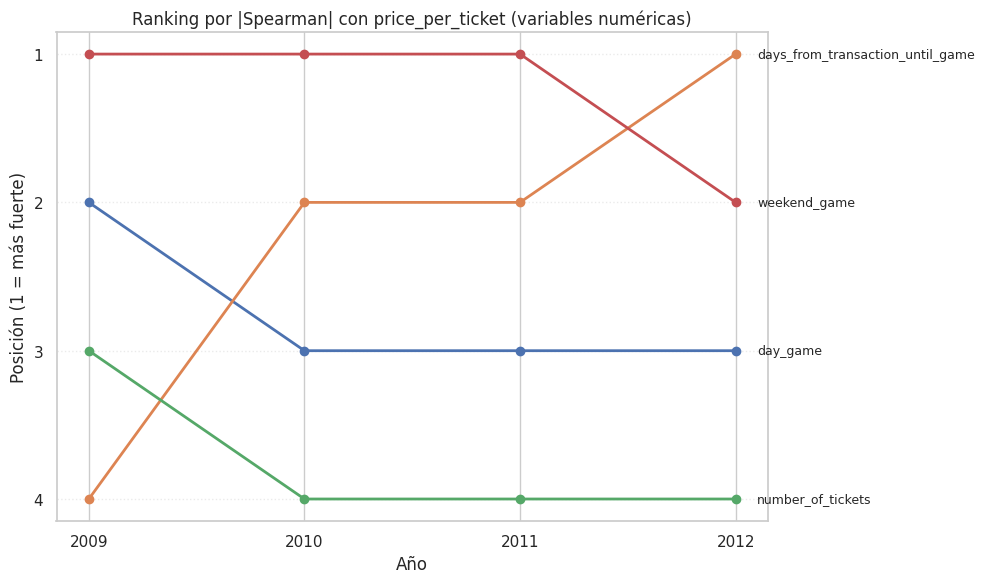

=== Ranking Spearman (1=Top) ===


año,2009,2010,2011,2012
variable,,,,
weekend_game,1.0,1.0,1.0,2.0
day_game,2.0,3.0,3.0,3.0
number_of_tickets,3.0,4.0,4.0,4.0
days_from_transaction_until_game,4.0,2.0,2.0,1.0


In [ ]:
from scipy.stats import spearmanr

ANIOS = [2009, 2010, 2011, 2012]
num_vars = ["days_from_transaction_until_game", "number_of_tickets", "day_game", "weekend_game"]
filas = []

for year in ANIOS:
    dfy = df_clean[df_clean["año"] == year]
    for var in num_vars:
        rho, pval = spearmanr(dfy[var], dfy["price_per_ticket"], nan_policy="omit")
        filas.append({"año": year, "variable": var, "rho": rho, "pval": pval})

df_spear = pd.DataFrame(filas)
df_spear["abs_rho"] = df_spear["rho"].abs()
df_spear["rank"] = df_spear.groupby("año")["abs_rho"].rank(ascending=False, method="min")

# --- Bump chart Spearman ---
plt.figure(figsize=(10, 6))
for var, sub in df_spear.groupby("variable"):
    sub = sub.sort_values("año")
    plt.plot(sub["año"], sub["rank"], marker="o", linewidth=2)
    last_row = sub[sub["año"] == sub["año"].max()].iloc[-1]
    plt.text(last_row["año"] + 0.1, last_row["rank"], var, va="center", fontsize=9)

plt.gca().invert_yaxis()
plt.yticks(sorted(df_spear["rank"].unique()))
plt.xticks(ANIOS)
plt.title("Ranking por |Spearman| con price_per_ticket (variables numéricas)")
plt.xlabel("Año")
plt.ylabel("Posición (1 = más fuerte)")
plt.grid(axis="y", linestyle=":", alpha=0.4)
plt.tight_layout()
plt.show()

# Tabla compacta
tabla_spear = df_spear.pivot(index="variable", columns="año", values="rank").sort_values(ANIOS, axis=0)
print("=== Ranking Spearman (1=Top) ===")
display(tabla_spear)


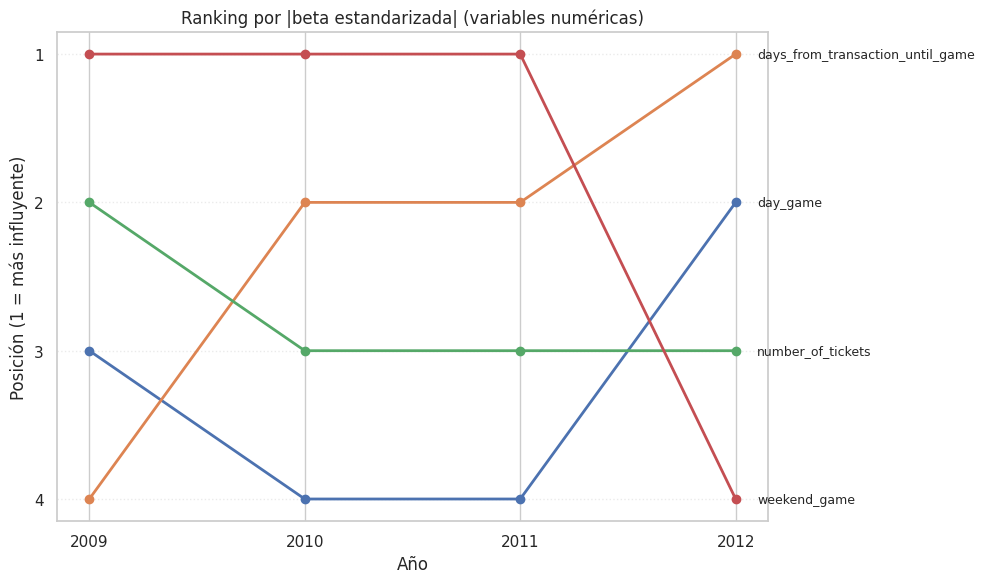

=== Ranking por betas estandarizadas (1=Top) ===


año,2009,2010,2011,2012
variable,,,,
day_game,3.0,4.0,4.0,2.0
days_from_transaction_until_game,4.0,2.0,2.0,1.0
number_of_tickets,2.0,3.0,3.0,3.0
weekend_game,1.0,1.0,1.0,4.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf

ANIOS = [2009, 2010, 2011, 2012]
num_vars = ["days_from_transaction_until_game", "number_of_tickets", "day_game", "weekend_game"]

filas = []

for year in ANIOS:
    dfy = df_clean[df_clean["año"] == year].copy()

    # Escalar variables numéricas + target
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(dfy[num_vars])
    y_scaled = StandardScaler().fit_transform(dfy[["price_per_ticket"]])

    # Ajustar modelo OLS con betas estandarizadas
    X = sm.add_constant(X_scaled)  # agrega intercepto
    model = sm.OLS(y_scaled, X).fit()

    # Guardar betas
    for var, coef in zip(["Intercept"] + num_vars, model.params):
        if var != "Intercept":
            filas.append({"año": year, "variable": var, "beta": coef})

df_betas = pd.DataFrame(filas)
df_betas["abs_beta"] = df_betas["beta"].abs()
df_betas["rank"] = df_betas.groupby("año")["abs_beta"].rank(ascending=False, method="min")

# --- Bump chart ---
plt.figure(figsize=(10,6))
for var, sub in df_betas.groupby("variable"):
    sub = sub.sort_values("año")
    plt.plot(sub["año"], sub["rank"], marker="o", linewidth=2)
    last_row = sub[sub["año"]==sub["año"].max()].iloc[-1]
    plt.text(last_row["año"]+0.1, last_row["rank"], var, va="center", fontsize=9)

plt.gca().invert_yaxis()
plt.yticks(sorted(df_betas["rank"].unique()))
plt.xticks(ANIOS)
plt.title("Ranking por |beta estandarizada| (variables numéricas)")
plt.xlabel("Año")
plt.ylabel("Posición (1 = más influyente)")
plt.grid(axis="y", linestyle=":", alpha=0.4)
plt.tight_layout()
plt.show()

# Tabla compacta
tabla_betas = df_betas.pivot(index="variable", columns="año", values="rank")
print("=== Ranking por betas estandarizadas (1=Top) ===")
display(tabla_betas)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy.stats import pearsonr, spearmanr

ANIOS = [2009, 2010, 2011, 2012]
num_vars = ["days_from_transaction_until_game", "number_of_tickets", "day_game", "weekend_game"]

filas = []

for year in ANIOS:
    dfy = df_clean[df_clean["año"] == year].copy()

    # --- 1) Betas estandarizadas ---
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(dfy[num_vars])
    y_scaled = StandardScaler().fit_transform(dfy[["price_per_ticket"]])

    X = sm.add_constant(X_scaled)
    model = sm.OLS(y_scaled, X).fit()

    # Guardar R²
    r2 = model.rsquared

    # --- 2) Coeficientes (betas) ---
    betas = dict(zip(num_vars, model.params[1:]))  # excluye intercepto

    # --- 3) Correlaciones Pearson y Spearman ---
    for var in num_vars:
        pear_r, pear_p = pearsonr(dfy[var], dfy["price_per_ticket"])
        spear_r, spear_p = spearmanr(dfy[var], dfy["price_per_ticket"])

        filas.append({
            "año": year,
            "variable": var,
            "beta_estandarizada": betas[var],
            "R2_modelo": r2,
            "pearson_r": pear_r,
            "spearman_r": spear_r
        })

# --- 4) Tabla final ---
tabla_resumen = pd.DataFrame(filas)

# Ordenar para mejor lectura
tabla_resumen = tabla_resumen.sort_values(["año","variable"]).reset_index(drop=True)

print("=== Resumen comparativo 2009–2012 ===")
display(tabla_resumen)


=== Resumen comparativo 2009–2012 ===


,año,variable,beta_estandarizada,R2_modelo,pearson_r,spearman_r
0,2009,day_game,0.062567,0.036035,0.098863,0.127762
1,2009,days_from_transaction_until_game,0.037386,0.036035,0.042734,0.060378
2,2009,number_of_tickets,-0.097196,0.036035,-0.101879,-0.107694
3,2009,weekend_game,0.124427,0.036035,0.147475,0.208529
4,2010,day_game,0.021940,0.076255,0.078966,0.117969
5,2010,days_from_transaction_until_game,0.134613,0.076255,0.156807,0.231872
6,2010,number_of_tickets,-0.103056,0.076255,-0.107950,-0.099257
7,2010,weekend_game,0.191562,0.076255,0.220760,0.309007
8,2011,day_game,0.057104,0.047569,0.089613,0.129433
9,2011,days_from_transaction_until_game,0.125019,0.047569,0.128385,0.225563


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr

# Años y variables numéricas de interés (coinciden con las columnas en df_clean)
ANIOS = [2009, 2010, 2011, 2012]
num_vars = ["days_from_transaction_until_game", "number_of_tickets", "day_game", "weekend_game"]

# Helper para construir la tabla de un año
def tabla_por_anio(year):
    modelo = resultados[year]  # modelo OLS multivariable para ese año
    coefs = modelo.params
    pvals = modelo.pvalues
    r2 = modelo.rsquared

    filas = []
    dfy = df_clean[df_clean["año"] == year]

    for var in coefs.index:
        fila = {
            "año": year,
            "variable": var,
            "beta": coefs[var],
            "pval": pvals[var],
            "R2_modelo": r2,
            "pearson_r": np.nan,
            "spearman_r": np.nan
        }
        # Solo calculamos correlaciones para variables numéricas "crudas"
        if var in num_vars:
            # Evitar errores si hay NaN
            x = dfy[var].astype(float)
            y = dfy["price_per_ticket"].astype(float)
            # Filtrar NaN por seguridad
            mask = x.notna() & y.notna()
            if mask.any():
                pr, _ = pearsonr(x[mask], y[mask])
                sr, _ = spearmanr(x[mask], y[mask])
                fila["pearson_r"] = pr
                fila["spearman_r"] = sr
        filas.append(fila)

    df_tabla = pd.DataFrame(filas)

    # Orden sugerido: variables numéricas primero, luego categóricas, y dentro por |beta|
    df_tabla["es_numerica"] = df_tabla["variable"].isin(num_vars)
    df_tabla["abs_beta"] = df_tabla["beta"].abs()
    df_tabla = (df_tabla
                .sort_values(["es_numerica", "abs_beta"], ascending=[False, False])
                .drop(columns=["es_numerica","abs_beta"])
                .reset_index(drop=True))
    # Redondeo para presentación
    df_tabla[["beta","pval","R2_modelo","pearson_r","spearman_r"]] = \
        df_tabla[["beta","pval","R2_modelo","pearson_r","spearman_r"]].round(6)
    return df_tabla

# Generar y mostrar las 4 tablas
tabla_2009 = tabla_por_anio(2009)
tabla_2010 = tabla_por_anio(2010)
tabla_2011 = tabla_por_anio(2011)
tabla_2012 = tabla_por_anio(2012)

print("=== 2009 ===")
display(tabla_2009)
print("=== 2010 ===")
display(tabla_2010)
print("=== 2011 ===")
display(tabla_2011)
print("=== 2012 ===")
display(tabla_2012)

# (Opcional) Exportar a CSV cada tabla
# tabla_2009.to_csv("resumen_regresion_2009.csv", index=False)
# tabla_2010.to_csv("resumen_regresion_2010.csv", index=False)
# tabla_2011.to_csv("resumen_regresion_2011.csv", index=False)
# tabla_2012.to_csv("resumen_regresion_2012.csv", index=False)


=== 2009 ===


,año,variable,beta,pval,R2_modelo,pearson_r,spearman_r
0,2009,day_game,10.828664,0.000000,0.736568,0.098863,0.127762
1,2009,weekend_game,-7.722679,0.000000,0.736568,0.147475,0.208529
2,2009,number_of_tickets,1.787913,0.000000,0.736568,-0.101879,-0.107694
3,2009,days_from_transaction_until_game,0.109053,0.000000,0.736568,0.042734,0.060378
4,2009,Intercept,473.973257,0.000000,0.736568,NaN,NaN
5,2009,C(sectiontype)[T.pavsro],-433.252622,0.000000,0.736568,NaN,NaN
6,2009,C(sectiontype)[T.sro],-432.600996,0.000000,0.736568,NaN,NaN
7,2009,C(sectiontype)[T.upperbleachers],-420.719150,0.000000,0.736568,NaN,NaN
8,2009,C(sectiontype)[T.rfgs],-409.683668,0.000000,0.736568,NaN,NaN
9,2009,C(sectiontype)[T.rfdeck_sro],-408.657878,0.000000,0.736568,NaN,NaN


=== 2010 ===


,año,variable,beta,pval,R2_modelo,pearson_r,spearman_r
0,2010,weekend_game,20.109538,0.000000,0.709771,0.220760,0.309007
1,2010,day_game,6.594188,0.000000,0.709771,0.078966,0.117969
2,2010,number_of_tickets,1.370706,0.000000,0.709771,-0.107950,-0.099257
3,2010,days_from_transaction_until_game,0.235700,0.000000,0.709771,0.156807,0.231872
4,2010,C(sectiontype)[T.sro],-414.101879,0.000000,0.709771,NaN,NaN
5,2010,C(sectiontype)[T.pavsro],-409.596154,0.000000,0.709771,NaN,NaN
6,2010,C(sectiontype)[T.upperbleachers],-404.538980,0.000000,0.709771,NaN,NaN
7,2010,C(sectiontype)[T.rfdeck_sro],-394.322427,0.000000,0.709771,NaN,NaN
8,2010,C(sectiontype)[T.rfgs],-392.222923,0.000000,0.709771,NaN,NaN
9,2010,C(sectiontype)[T.lowerbleachers],-391.536160,0.000000,0.709771,NaN,NaN


=== 2011 ===


,año,variable,beta,pval,R2_modelo,pearson_r,spearman_r
0,2011,weekend_game,15.017244,0.000000,0.683216,0.150286,0.245886
1,2011,day_game,12.613033,0.000000,0.683216,0.089613,0.129433
2,2011,number_of_tickets,2.265288,0.000000,0.683216,-0.080838,-0.069369
3,2011,days_from_transaction_until_game,0.242508,0.000000,0.683216,0.128385,0.225563
4,2011,C(sectiontype)[T.pavsro],-400.812845,0.000000,0.683216,NaN,NaN
5,2011,C(sectiontype)[T.sro],-400.530537,0.000000,0.683216,NaN,NaN
6,2011,C(sectiontype)[T.upperbleachers],-392.196230,0.000000,0.683216,NaN,NaN
7,2011,C(sectiontype)[T.rfdeck_sro],-388.368487,0.000000,0.683216,NaN,NaN
8,2011,Intercept,384.510850,0.000000,0.683216,NaN,NaN
9,2011,C(sectiontype)[T.rfgs],-381.935390,0.000000,0.683216,NaN,NaN


=== 2012 ===


,año,variable,beta,pval,R2_modelo,pearson_r,spearman_r
0,2012,weekend_game,-32.438298,0.000000,0.548622,0.094728,0.235086
1,2012,day_game,11.299022,0.000000,0.548622,0.082036,0.139688
2,2012,number_of_tickets,1.529102,0.000000,0.548622,-0.077121,-0.068943
3,2012,days_from_transaction_until_game,0.393470,0.000000,0.548622,0.223894,0.408728
4,2012,Intercept,474.133915,0.000000,0.548622,NaN,NaN
5,2012,C(sectiontype)[T.sro],-372.343691,0.000000,0.548622,NaN,NaN
6,2012,C(sectiontype)[T.pavsro],-369.214029,0.000000,0.548622,NaN,NaN
7,2012,C(sectiontype)[T.upperbleachers],-355.640745,0.000000,0.548622,NaN,NaN
8,2012,C(sectiontype)[T.rfdeck_sro],-350.587417,0.000000,0.548622,NaN,NaN
9,2012,C(sectiontype)[T.rfgs],-348.077943,0.000000,0.548622,NaN,NaN


In [ ]:
import numpy as np
import pandas as pd

def correlation_ratio(categories, values):
    """
    Eta (η): relación de correlación categórica–numérica.
    0..1  (0 = sin relación; 1 = perfecta)
    """
    cat = pd.Series(categories).astype("category")
    y = pd.Series(values).astype(float)
    groups = [y[cat == k].dropna().values for k in cat.cat.categories]
    n_total = np.sum([len(g) for g in groups])
    y_mean = y.mean()

    ss_between = np.sum([len(g) * (g.mean() - y_mean)**2 for g in groups])
    ss_total = np.sum((y - y_mean)**2)
    return np.sqrt(ss_between / ss_total) if ss_total > 0 else np.nan

ANIOS = [2009, 2010, 2011, 2012]
cat_vars = ["team", "sectiontype", "gamemonth"]  # ajusta si deseas

filas_eta = []
for year in ANIOS:
    dfy = df_clean[df_clean["año"] == year]
    for var in cat_vars:
        eta = correlation_ratio(dfy[var], dfy["price_per_ticket"])
        filas_eta.append({"año": year, "variable": var, "eta": eta})

eta_tabla = pd.DataFrame(filas_eta).sort_values(["año","eta"], ascending=[True, False])
print("Relación de correlación (η) categórica–precio por año:")
display(eta_tabla)


Relación de correlación (η) categórica–precio por año:


,año,variable,eta
1,2009,sectiontype,0.760255
0,2009,team,0.360544
2,2009,gamemonth,0.153222
4,2010,sectiontype,0.735446
3,2010,team,0.359711
5,2010,gamemonth,0.193432
7,2011,sectiontype,0.698964
6,2011,team,0.403223
8,2011,gamemonth,0.203806
10,2012,sectiontype,0.579375
